
Graph Theory Analysis for extracting signals from a brain parcellation 
============================================
### Group 1 (HC | SCI)

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets

# Using the NiftiLabelsMasker
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from brainconn import degree, centrality, clustering, core, distance, modularity, utils
from nilearn import plotting 
from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures
from nilearn import datasets

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Atlas ROIs are located in nifti image (4D) at: /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


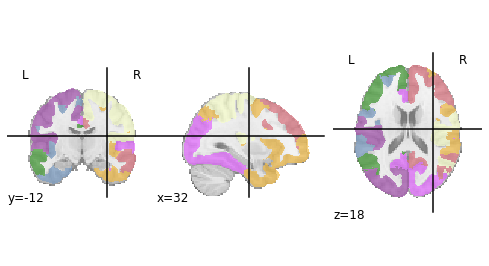

In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# Plot the ROI and save as PDF
fig = plotting.plot_roi(atlas_filename, cmap=cmap)
fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

In [3]:
#%% Load the functional datasets (hc and sci, or sci_c and sci_t) and 
# extract signals (timeseries) on a parcellation defined by labels
# then calculating the correlation and binarized matrices
# ----------------------------------------------------

# masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
#                            memory='nilearn_cache', verbose=5)

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

data_path = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/02_postNR'

analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY

if analysis == "ALL":
    group = ['hc', 'sci']; group_label = ['Healthy Control', 'Spinal Cord Injury']
elif analysis == "SCI":
    group = ['sci_c', 'sci_t']; group_label = ['Cervical SCI', 'Thoracic SCI']

corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


### Load data from Group 1

In [4]:
#=============================================================================
ts_g1, ts_g2 = [], []

nii_g1 = sorted(os.listdir(data_path+'/'+ group[0]))
nii_g1 = [x for x in nii_g1 if x.startswith('errts')] # remove not-nifti elements
nii_g2 = sorted(os.listdir(data_path+'/'+ group[1]))
nii_g2 = [x for x in nii_g2 if x.startswith('errts')] # remove not-nifti elements

# reading the nifti files
for nii in nii_g1: # healthy controls
    ts_g1.append(masker.fit_transform(data_path + '/'+ group[0] + '/'+ nii)) # ts_g = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from G1 dataset: '+'{}\n'.format(nii))
for nii in nii_g2: # patients
    ts_g2.append(masker.fit_transform(data_path + '/'+ group[1] + '/'+ nii)) # ts_g2 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from G2 dataset:'+'{}\n'.format(nii))
# saving numpy arrays (timeseries)
np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[0], ts_g1) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[1], ts_g2)   

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.14275.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]0.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.14275.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]0.4s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min

[Memory]1.6s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nc20110804kk.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nc20110830si.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nc20120830jm.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2

[Memory]3.0s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby502.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]3.0s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby502.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]3.1s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby505.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Sc

[Memory]4.3s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby934.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]4.4s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby934.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]4.4s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby959.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Sc

[Memory]5.9s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.61375.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]5.9s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.61375.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]6.0s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.72236.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parc

[Memory]7.2s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.sci20130719bk.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]7.3s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.sci20130719bk.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]7.3s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.sci20130722lm.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

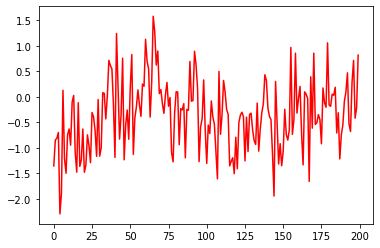

In [5]:
# loading numpy arrays (timeseries)
ts_g1 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[0] + '.npy', allow_pickle=True))
ts_g2 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[1] + '.npy', allow_pickle=True))

# calculating correlations
corr_g1 = corr_measure.fit_transform(ts_g1)
corr_g2 = corr_measure.fit_transform(ts_g2)
# Save arrays into a MATLAB-style .mat file for modularity


corr_path = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/fc/'

# corr_hc.mat corr_sci.mat
savemat(corr_path + 'corr_'+group[0]+'.mat', {'corr_'+group[0]: corr_g1})
savemat(corr_path + 'corr_'+group[1]+'.mat', {'corr_'+group[1]: corr_g2})

# plot a subject's timeseries
plt.plot(np.arange(0, 200), ts_g1[0][4,:].transpose(), color='red')
plt.show()

#%% Display the mean correlation and binarized matrices

thld = 0.3

# calculate the mean correlation and binary matrices
corr_g1_mean = np.mean(corr_g1, axis=0)
corr_g2_mean = np.mean(corr_g2, axis=0)
bin_g1_mean = utils.binarize(utils.threshold_proportional(corr_g1_mean, thld, copy=True))
bin_g2_mean = utils.binarize(utils.threshold_proportional(corr_g2_mean, thld, copy=True))

# general plot settings
split = np.array([-0.5, 13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5, 199.5])
color = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D',
         '#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

In [6]:
print(f'{analysis} has {len(ts_g1)} {group[0]} & {len(ts_g2)} {group[1]}')

ALL has 76 hc & 61 sci


0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5


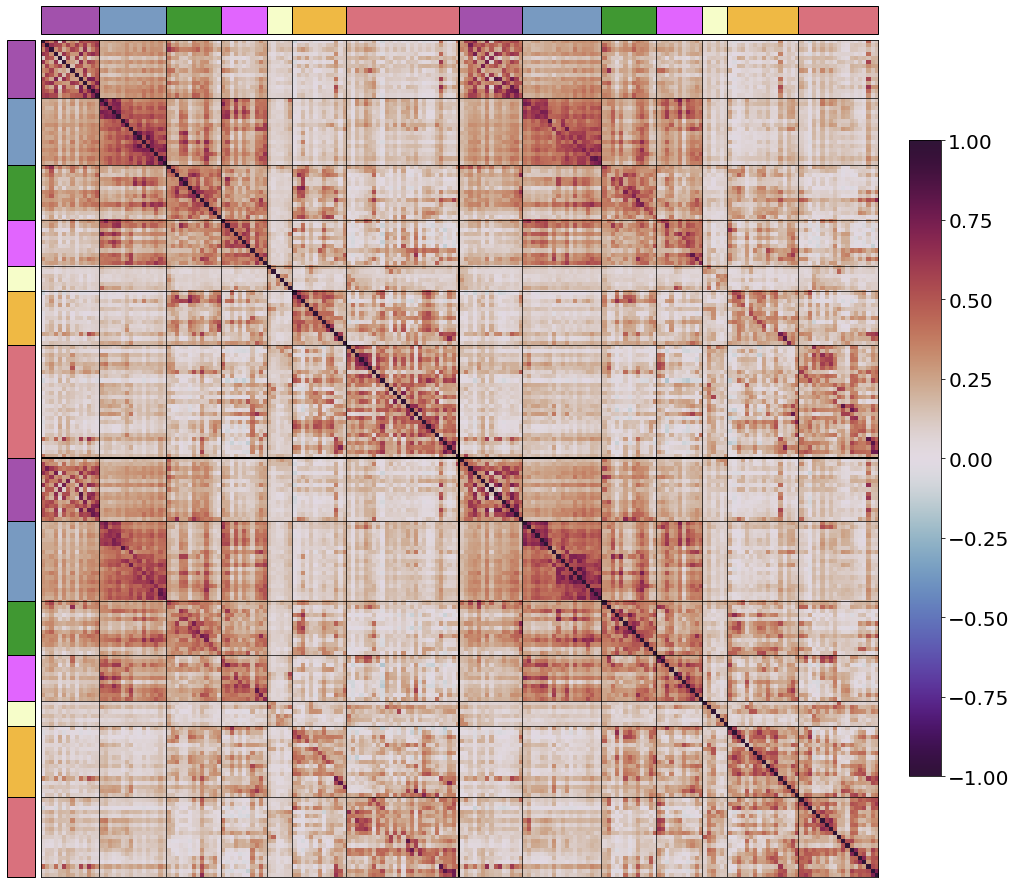

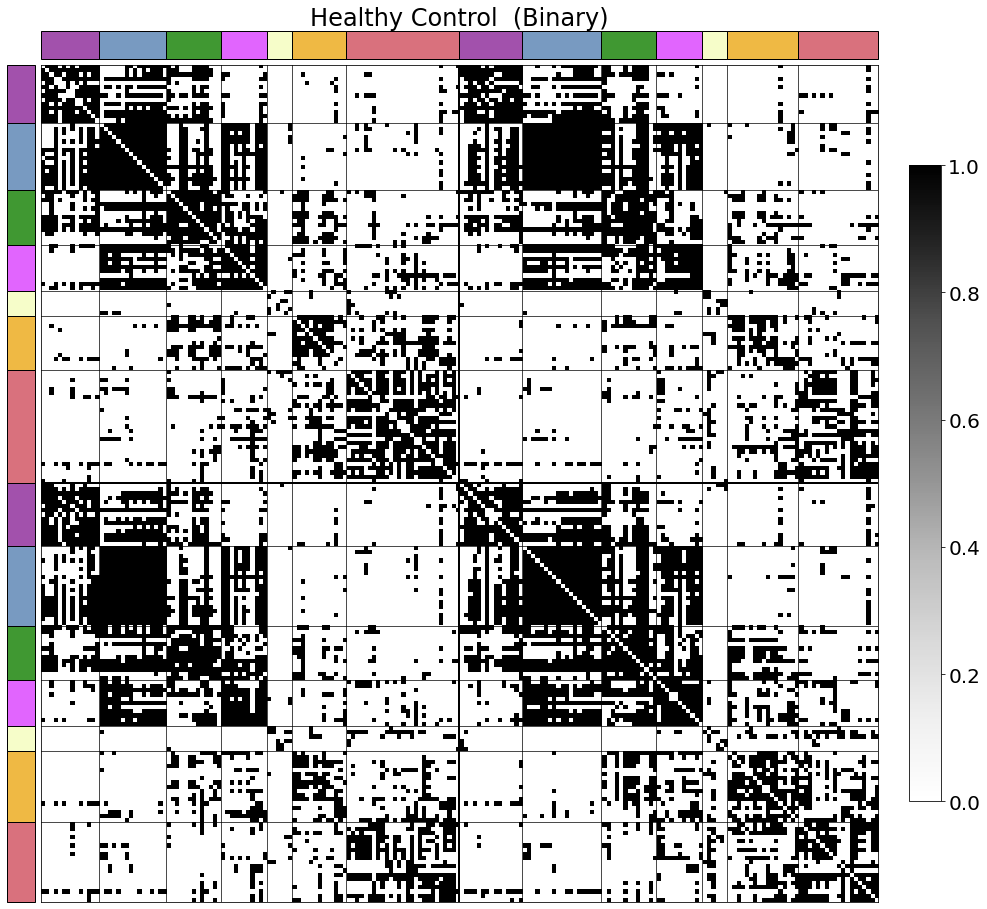

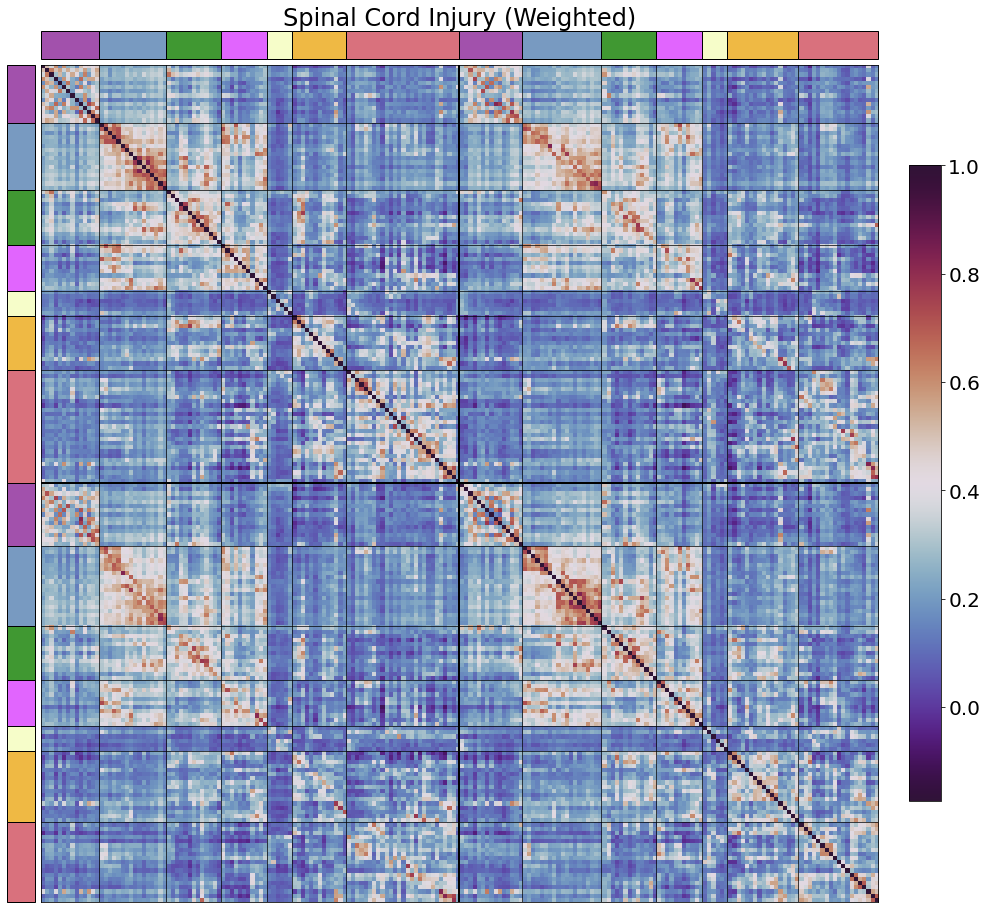

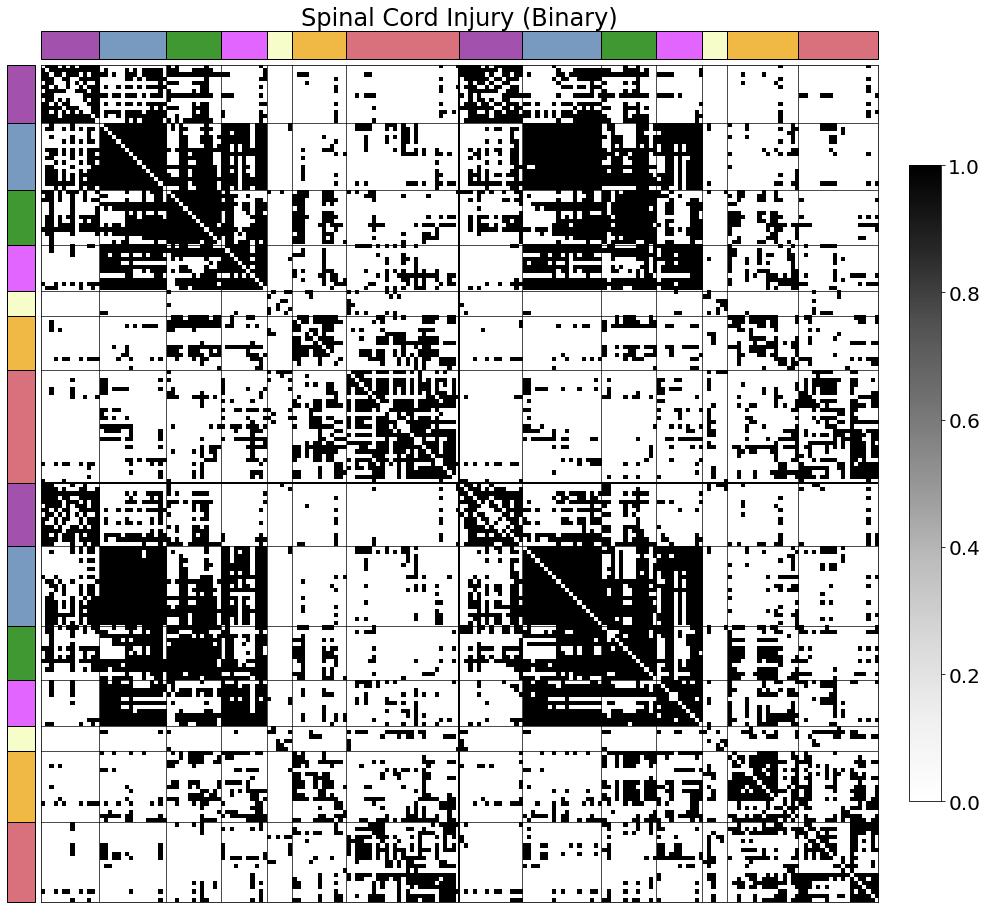

In [7]:
# -----------------------------------
# Group 1, weighted correlations
f = plt.figure(figsize=(19,15))
plt.matshow(corr_g1_mean, fignum=f.number, vmin = -1, vmax = 1, cmap='twilight_shifted')
# plt.title(group_label[0]+' (weighted)', fontsize=22, y=1.04)
#plt.xticks(range(corr_hc_mean.shape[1]), systems, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(corr_hc_mean.shape[1]), systems, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(fraction=0.03, pad=0.03) #cb.ax.tick_params(labelsize=14)
cb.ax.tick_params(labelsize=20)
plt.axvline(x=100-0.5,color='k',linewidth=2)
plt.axhline(y=100-0.5,color='k',linewidth=2)
# Draw grid lines
plt.grid(color='black', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False, top=False, left=False, right=False, labeltop=False, labelleft=False) # ticks and labels along the edge are off

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
xy = split[:-1] # anchor points
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
w = split[1:] - xy # rectangle width(s)
for j in range(len(xy)): # plot rectangles one-by-one
    plt.gca().add_patch(patches.Rectangle((xy[j], i), width=w[j], height=h, facecolor=color[j], clip_on=False, linewidth=1, edgecolor='k'))

# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
h = split[1:] - xy # rectangle height(s)
for j in range(len(xy)): # plot rectangles one-by-one
    plt.gca().add_patch(patches.Rectangle((i+space, xy[j]), width=w, height=h[j], facecolor=color[j], clip_on=False, linewidth=1, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/corr_'+group[0]+'_mean.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)

#### -----------------------------------
# Group 1, binarized correlations
f = plt.figure(figsize=(19,15))
plt.matshow(bin_g1_mean, fignum=f.number, vmin = 0, vmax = 1, cmap='Greys')
plt.title(group_label[0]+'  (Binary)', fontsize=24, y=1.04)
#plt.xticks(range(corr_hc_mean.shape[1]), systems, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(corr_hc_mean.shape[1]), systems, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(fraction=0.03, pad=0.03) #cb.ax.tick_params(labelsize=14)
cb.ax.tick_params(labelsize=20)
plt.axvline(x=100-0.5,color='k',linewidth=2)
plt.axhline(y=100-0.5,color='k',linewidth=2)
# Draw grid lines
plt.grid(color='black', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False, top=False, left=False, right=False, labeltop=False, labelleft=False) # ticks and labels along the edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
xy = split[:-1] # anchor points
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
w = split[1:] - xy # rectangle width(s)
for j in range(len(xy)): # plot rectangles one-by-one
    plt.gca().add_patch(patches.Rectangle((xy[j], i), width=w[j], height=h, facecolor=color[j], clip_on=False, linewidth=1, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
h = split[1:] - xy # rectangle height(s)
for j in range(len(xy)): # plot rectangles one-by-one
    plt.gca().add_patch(patches.Rectangle((i+space, xy[j]), width=w, height=h[j], facecolor=color[j], clip_on=False, linewidth=1, edgecolor='k'))
# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/bin_'+group[0]+'_mean.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)

#### -----------------------------------
# Group 2, weighted correlations twilight_shifted jet
f = plt.figure(figsize=(19,15))
plt.matshow(corr_g2_mean, fignum=f.number, vmin = np.min(corr_g1_mean), vmax = 1, cmap='twilight_shifted')
plt.title(group_label[1]+' (Weighted)', fontsize=24, y=1.04)
#plt.xticks(range(corr_hc_mean.shape[1]), systems, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(corr_hc_mean.shape[1]), systems, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(fraction=0.03, pad=0.03) #cb.ax.tick_params(labelsize=14)
cb.ax.tick_params(labelsize=20)
plt.axvline(x=100-0.5,color='k',linewidth=2)
plt.axhline(y=100-0.5,color='k',linewidth=2)
# Draw grid lines
plt.grid(color='black', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False, top=False, left=False, right=False, labeltop=False, labelleft=False) # ticks and labels along the edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
xy = split[:-1] # anchor points
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
w = split[1:] - xy # rectangle width(s)
for j in range(len(xy)): # plot rectangles one-by-one
    plt.gca().add_patch(patches.Rectangle((xy[j], i), width=w[j], height=h, facecolor=color[j], clip_on=False, linewidth=1, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
h = split[1:] - xy # rectangle height(s)
for j in range(len(xy)): # plot rectangles one-by-one
    plt.gca().add_patch(patches.Rectangle((i+space, xy[j]), width=w, height=h[j], facecolor=color[j], clip_on=False, linewidth=1, edgecolor='k'))
# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/corr_'+group[1]+'_mean.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)

#### -----------------------------------
# Spinal cord injury patients, binarized correlations
f = plt.figure(figsize=(19,15))
plt.matshow(bin_g2_mean, fignum=f.number, vmin = 0, vmax = 1, cmap='Greys')
plt.title(group_label[1]+' (Binary)', fontsize=24, y=1.04)
#plt.xticks(range(corr_hc_mean.shape[1]), systems, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(corr_hc_mean.shape[1]), systems, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(fraction=0.03, pad=0.03) #cb.ax.tick_params(labelsize=14)
cb.ax.tick_params(labelsize=20)
plt.axvline(x=100-0.5,color='k',linewidth=2)
plt.axhline(y=100-0.5,color='k',linewidth=2)
# Draw grid lines
plt.grid(color='black', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False, top=False, left=False, right=False, labeltop=False, labelleft=False) # ticks and labels along the edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
xy = split[:-1] # anchor points
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
w = split[1:] - xy # rectangle width(s)
for j in range(len(xy)): # plot rectangles one-by-one
    plt.gca().add_patch(patches.Rectangle((xy[j], i), width=w[j], height=h, facecolor=color[j], clip_on=False, linewidth=1, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
h = split[1:] - xy # rectangle height(s)
for j in range(len(xy)): # plot rectangles one-by-one
    plt.gca().add_patch(patches.Rectangle((i+space, xy[j]), width=w, height=h[j], facecolor=color[j], clip_on=False, linewidth=1, edgecolor='k'))
# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/bin_'+group[1]+'_mean.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)

#### define global measures Group 1
n_g1 = np.shape(corr_g1)[0] # number of Group 1 subjects
lam_g1 = np.zeros((n_g1,10)) # lambda (characteristic path length)
glb_g1 = np.zeros((n_g1,10)) # global efficieny
clc_g1 = np.zeros((n_g1,10)) # global clustering coefficients
tra_g1 = np.zeros((n_g1,10)) # Transitivity
ass_g1 = np.zeros((n_g1,10)) # assortativity
mod_g1 = np.zeros((n_g1,10)) # modularity

for i in range(10):
    thld = np.float32((i+1)*0.05)    
    # matrix binarization
    bin_g1 = np.zeros(np.shape(corr_g1))
    for k in range(n_g1):
        bin_g1[k] = utils.binarize(utils.threshold_proportional(corr_g1[k], thld, copy=True))   
    # compute global measures HC
    for k in range(n_g1):                
        dis = distance.distance_bin(bin_g1[k]) # TIME CONSUMING  
        lam_g1[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
        glb_g1[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
        clc_g1[k,i] = np.mean(clustering.clustering_coef_bu(bin_g1[k]))
        tra_g1[k,i] = np.mean(clustering.transitivity_bu(bin_g1[k]))
        ass_g1[k,i] = core.assortativity_bin(bin_g1[k], flag=0) # 0: undirected graph
        mod_g1[k,i] = modularity.modularity_louvain_und(bin_g1[k], gamma=1.0, hierarchy=False, seed=None)[1]     
    print(thld)

    
# define global measures Group 2
n_g2 = np.shape(corr_g2)[0] # number of Group 2 subjects

lam_g2 = np.zeros((n_g2,10)) # lambda (characteristic path length)
glb_g2 = np.zeros((n_g2,10)) # global efficieny
clc_g2 = np.zeros((n_g2,10)) # global clustering coefficients
tra_g2 = np.zeros((n_g2,10)) # Transitivity
ass_g2 = np.zeros((n_g2,10)) # assortativity
mod_g2 = np.zeros((n_g2,10)) # modularity

for i in range(10):
    thld = np.float32((i+1)*0.05)
    # matrix binarization
    bin_g2 = np.zeros(np.shape(corr_g2))
    for k in range(n_g2):
        bin_g2[k] = utils.binarize(utils.threshold_proportional(corr_g2[k], thld, copy=True))
    # compute global measures SCI
    for k in range(n_g2):                
        dis = distance.distance_bin(bin_g2[k]) # TIME CONSUMING  
        lam_g2[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
        glb_g2[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
        clc_g2[k,i] = np.mean(clustering.clustering_coef_bu(bin_g2[k]))
        tra_g2[k,i] = np.mean(clustering.transitivity_bu(bin_g2[k]))
        ass_g2[k,i] = core.assortativity_bin(bin_g2[k], flag=0) # 0: undirected graph
        mod_g2[k,i] = modularity.modularity_louvain_und(bin_g2[k], gamma=1.0, hierarchy=False, seed=None)[1] 
    print(thld)

In [8]:
print(f'MinMax weighted: {np.min(corr_g1_mean), np.min(corr_g2_mean), np.max(corr_g1_mean), np.max(corr_g2_mean)}\nMinMax Binary: {np.min(bin_g1_mean), np.min(bin_g2_mean), np.max(bin_g1_mean), np.max(bin_g2_mean)} ')
# corr_g1_mean bin_g1_mean

MinMax weighted: (-0.17405021, -0.10945167, 1.0, 1.0)
MinMax Binary: (0.0, 0.0, 1.0, 1.0) 


modularity 0.0233
modularity 0.0093
modularity 0.0114
modularity 0.0042
modularity 0.0023
modularity 0.0003
modularity 0.0002
modularity 0.0
modularity 0.0002
modularity 0.0
Group 1 0
Group 1 1
Group 1 2
Group 1 3
Group 1 4
Group 1 5
Group 1 6
Group 1 7
Group 1 8
Group 1 9
Group 1 10
Group 1 11
Group 1 12
Group 1 13
Group 1 14
Group 1 15
Group 1 16
Group 1 17
Group 1 18
Group 1 19
Group 1 20
Group 1 21
Group 1 22
Group 1 23
Group 1 24
Group 1 25
Group 1 26
Group 1 27
Group 1 28
Group 1 29
Group 1 30
Group 1 31
Group 1 32
Group 1 33
Group 1 34
Group 1 35
Group 1 36
Group 1 37
Group 1 38
Group 1 39
Group 1 40
Group 1 41
Group 1 42
Group 1 43
Group 1 44
Group 1 45
Group 1 46
Group 1 47
Group 1 48
Group 1 49
Group 1 50
Group 1 51
Group 1 52
Group 1 53
Group 1 54
Group 1 55
Group 1 56
Group 1 57
Group 1 58
Group 1 59
Group 1 60
Group 1 61
Group 1 62
Group 1 63
Group 1 64
Group 1 65
Group 1 66
Group 1 67
Group 1 68
Group 1 69
Group 1 70
Group 1 71
Group 1 72
Group 1 73
Group 1 74
Group 1 75


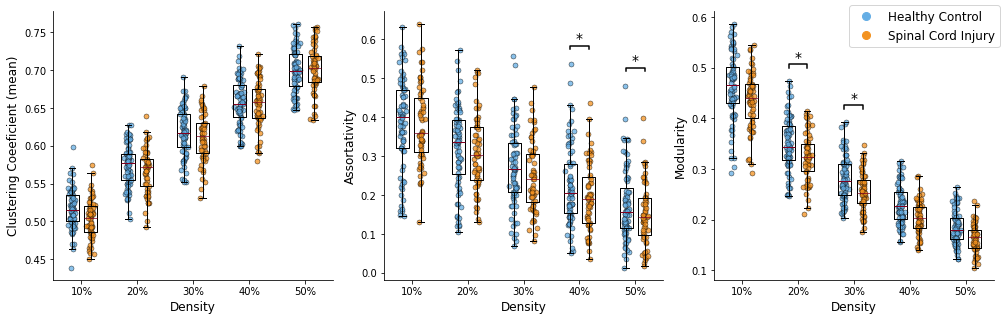

In [9]:
# permutation test
def perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc

# lam, glb, clc, tra, ass, mod
for i in range(10):
    print('modularity', perm_test(mod_g1[:,i], mod_g2[:,i], 10000))
    
# %% define/compute local measures  
thld = 0.3

# Group 1
deg_l_g1 = np.zeros((n_g1,200))
eig_l_g1 = np.zeros((n_g1,200))
clc_l_g1 = np.zeros((n_g1,200))
eff_l_g1 = np.zeros((n_g1,200))
kco_l_g1 = np.zeros((n_g1,200))   

bin_g1 = np.zeros(np.shape(corr_g1))   
  
for k in range(n_g1): 
    
    bin_g1[k] = utils.binarize(utils.threshold_proportional(corr_g1[k], thld, copy=True))
    
    deg_l_g1[k,:] = degree.degrees_und(bin_g1[k])
    eig_l_g1[k,:] = centrality.eigenvector_centrality_und(bin_g1[k])
    clc_l_g1[k,:] = clustering.clustering_coef_bu(bin_g1[k])
    eff_l_g1[k,:] = distance.efficiency_bin(bin_g1[k], local=True) # [Time consuming]^n: 
    kco_l_g1[k,:] = centrality.kcoreness_centrality_bu(bin_g1[k])[0]
    print('Group 1', k)  
    

# Group 2
deg_l_g2 = np.zeros((n_g2,200))
eig_l_g2 = np.zeros((n_g2,200))
clc_l_g2 = np.zeros((n_g2,200))
eff_l_g2 = np.zeros((n_g2,200))
kco_l_g2 = np.zeros((n_g2,200))   

bin_g2 = np.zeros(np.shape(corr_g2))   
  
for k in range(n_g2): 
    
    bin_g2[k] = utils.binarize(utils.threshold_proportional(corr_g2[k], thld, copy=True))
    
    deg_l_g2[k,:] = degree.degrees_und(bin_g2[k])
    eig_l_g2[k,:] = centrality.eigenvector_centrality_und(bin_g2[k])
    clc_l_g2[k,:] = clustering.clustering_coef_bu(bin_g2[k])
    eff_l_g2[k,:] = distance.efficiency_bin(bin_g2[k], local=True) # [Time consuming]^n: 
    kco_l_g2[k,:] = centrality.kcoreness_centrality_bu(bin_g2[k])[0]
    print('Group 2', k)
    

#%% BOXPLOT: Display every observations over the boxplot
# Note that violin plots can be an alternative if you have many many observations. 
# Another way to plot boxplot is via: seaborn -> https://seaborn.pydata.org/generated/seaborn.boxplot.html  or https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/     
 
color = ['#65AEE5', '#F39220']

datasetA1 = lam_g1[:,1:10:2]
datasetA2 = lam_g2[:,1:10:2]
datasetB1 = clc_g1[:,1:10:2]
datasetB2 = clc_g2[:,1:10:2]
datasetC1 = ass_g1[:,1:10:2]
datasetC2 = ass_g2[:,1:10:2]
datasetD1 = mod_g1[:,1:10:2]
datasetD2 = mod_g2[:,1:10:2]

ticks = ['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%']
ticks = ['10%', '20%', '30%', '40%', '50%']

dfA1 = pd.DataFrame(datasetA1, columns=ticks)
dfA2 = pd.DataFrame(datasetA2, columns=ticks)
dfB1 = pd.DataFrame(datasetB1, columns=ticks)
dfB2 = pd.DataFrame(datasetB2, columns=ticks)
dfC1 = pd.DataFrame(datasetC1, columns=ticks)
dfC2 = pd.DataFrame(datasetC2, columns=ticks)
dfD1 = pd.DataFrame(datasetD1, columns=ticks)
dfD2 = pd.DataFrame(datasetD2, columns=ticks)

names = []
valsA1, xsA1, valsA2, xsA2 = [],[], [],[]
valsB1, xsB1, valsB2, xsB2 = [],[], [],[]
valsC1, xsC1, valsC2, xsC2 = [],[], [],[]
valsD1, xsD1, valsD2, xsD2 = [],[], [],[]

for i, col in enumerate(dfA1.columns):
    valsA1.append(dfA1[col].values)
    valsA2.append(dfA2[col].values)
    valsB1.append(dfB1[col].values)
    valsB2.append(dfB2[col].values)
    valsC1.append(dfC1[col].values)
    valsC2.append(dfC2[col].values)
    valsD1.append(dfD1[col].values)
    valsD2.append(dfD2[col].values)
    names.append(col)
    # Add some random "jitter" to the data points
    xsA1.append(np.random.normal(i*3-0.5, 0.08, dfA1[col].values.shape[0]))
    xsA2.append(np.random.normal(i*3+0.5, 0.08, dfA2[col].values.shape[0]))
    xsB1.append(np.random.normal(i*3-0.5, 0.08, dfB1[col].values.shape[0]))
    xsB2.append(np.random.normal(i*3+0.5, 0.08, dfB2[col].values.shape[0]))
    xsC1.append(np.random.normal(i*3-0.5, 0.08, dfC1[col].values.shape[0]))
    xsC2.append(np.random.normal(i*3+0.5, 0.08, dfC2[col].values.shape[0]))
    xsD1.append(np.random.normal(i*3-0.5, 0.08, dfD1[col].values.shape[0]))
    xsD2.append(np.random.normal(i*3+0.5, 0.08, dfD2[col].values.shape[0]))

fig, (ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(14, 4.5))

#bpA1 = ax1.boxplot(valsA1, labels=names, positions=np.array(range(len(datasetA1[0])))*3-0.5, sym='', widths=0.7)
#bpA2 = ax1.boxplot(valsA2, labels=names, positions=np.array(range(len(datasetA2[0])))*3+0.5, sym='', widths=0.7)
bpB1 = ax2.boxplot(valsB1, labels=names, positions=np.array(range(len(datasetB1[0])))*3-0.5, sym='', widths=0.7)
bpB2 = ax2.boxplot(valsB2, labels=names, positions=np.array(range(len(datasetB2[0])))*3+0.5, sym='', widths=0.7)
bpC1 = ax3.boxplot(valsC1, labels=names, positions=np.array(range(len(datasetC1[0])))*3-0.5, sym='', widths=0.7)
bpC2 = ax3.boxplot(valsC2, labels=names, positions=np.array(range(len(datasetC2[0])))*3+0.5, sym='', widths=0.7)
bpD1 = ax4.boxplot(valsD1, labels=names, positions=np.array(range(len(datasetD1[0])))*3-0.5, sym='', widths=0.7)
bpD2 = ax4.boxplot(valsD2, labels=names, positions=np.array(range(len(datasetD2[0])))*3+0.5, sym='', widths=0.7)
# Optional: change the color of 'boxes', 'whiskers', 'caps', 'medians', and 'fliers'
#plt.setp(bpA1['medians'], color='#800020') # or color='#D7191C' ...
#plt.setp(bpA2['medians'], linewidth=.7, linestyle='-', color='#800020')
plt.setp(bpB1['medians'], color='#800020')
plt.setp(bpB2['medians'], linewidth=.7, linestyle='-', color='#800020')
plt.setp(bpC1['medians'], color='#800020')
plt.setp(bpC2['medians'], linewidth=.7, linestyle='-', color='#800020')
plt.setp(bpD1['medians'], color='#800020')
plt.setp(bpD2['medians'], linewidth=.7, linestyle='-', color='#800020')

palette = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'tan', 'orchid', 'cyan', 'gold', 'crimson']
size = 25 # scatter point size
# =============================================================================
# for xA1, xA2, valA1, valA2, c in zip(xsA1, xsA2, valsA1, valsA2, palette):
#     ax1.scatter(xA1, valA1, alpha=0.75, color=color[0], s=size, linewidth=0.2, edgecolors='k') # plt.plot(xA1, valA1, 'r.', alpha=0.4)
#     ax1.scatter(xA2, valA2, alpha=0.75, color=color[1], s=size, linewidth=0.2, edgecolors='k')
#     
# =============================================================================
for xB1, xB2, valB1, valB2, c in zip(xsB1, xsB2, valsB1, valsB2, palette):
    ax2.scatter(xB1, valB1, alpha=0.75, color=color[0], s=size, linewidth=0.5, edgecolors='k')
    ax2.scatter(xB2, valB2, alpha=0.75, color=color[1], s=size, linewidth=0.5, edgecolors='k')   
    
for xC1, xC2, valC1, valC2, c in zip(xsC1, xsC2, valsC1, valsC2, palette):
    ax3.scatter(xC1, valC1, alpha=0.75, color=color[0], s=size, linewidth=0.5, edgecolors='k')
    ax3.scatter(xC2, valC2, alpha=0.75, color=color[1], s=size, linewidth=0.5, edgecolors='k') 
    
for xD1, xD2, valD1, valD2, c in zip(xsD1, xsD2, valsD1, valsD2, palette):
    ax4.scatter(xD1, valD1, alpha=0.75, color=color[0], s=size, linewidth=0.5, edgecolors='k')
    ax4.scatter(xD2, valD2, alpha=0.75, color=color[1], s=size, linewidth=0.5, edgecolors='k')     

annot_xs1_list = [-0.5, 2.5, 5.5, 8.5, 11.5, 14.5, 17.5, 20.5, 23.5, 26.5]
annot_xs2_list = [0.5, 3.5, 6.5, 9.5, 12.5, 15.5, 18.5, 21.5, 24.5, 27.5]

annot_xs1_list = [-0.5, 2.5, 5.5, 8.5, 11.5]
annot_xs2_list = [0.5, 3.5, 6.5, 9.5, 12.5]

# Use the pyplot interface to customize any subplot...
# =============================================================================
# # First subplot
# plt.sca(ax1)
# plt.xticks(range(0, len(ticks) * 3, 3), ticks)
# plt.xlim(-1.5, len(ticks)*3-1.5)
# plt.ylabel("Path Length", fontweight='normal', fontsize=12)
# plt.xlabel("Density", fontweight='normal', fontsize=12)
# plt.plot([], c='y', label=group_label[0], marker='o', linestyle='None', markersize=8) # e.g. of other colors, '#2C7BB6' https://htmlcolorcodes.com/ 
# plt.plot([], c='b', label=group_label[1], marker='o', linestyle='None', markersize=8)
# # Statistical annotation
# xs1 = np.array([annot_xs1_list[index] for index in []])
# xs2 = np.array([annot_xs2_list[index] for index in []])
# for x1, x2 in zip(xs1, xs2):  # e.g., column 25%
#     y, h, col = max(datasetA1[:,int((x1+x2)/6)].max(), datasetA2[:,int((x1+x2)/6)].max()) + 0.4, 0.12, 'k'
#     plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#     plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, size=14)      
# # Create empty plot with blank marker containing the extra label
# #plt.text(20.81, 5.18, "*", ha='center', va='bottom', color=col, size=14, zorder=10) 
# #plt.plot([], [], " ", label='Significant Mean ($P\leq 0.05$)', color='black')    
# #plt.legend(prop={'size':16})
# =============================================================================
    
# Second subplot
plt.sca(ax2)
plt.xticks(range(0, len(ticks) * 3, 3), ticks)
plt.xlim(-1.5, len(ticks)*3-1.5)
plt.ylabel("Clustering Coeeficient (mean)", fontweight='normal', fontsize=12)
plt.xlabel("Density", fontweight='normal', fontsize=12)
plt.plot([], c=color[0], label=group_label[0], marker='o', linestyle='None', markersize=8) # e.g. of other colors, '#2C7BB6' https://htmlcolorcodes.com/ 
plt.plot([], c=color[1], label=group_label[1], marker='o', linestyle='None', markersize=8)
# Statistical annotation
xs1 = np.array([annot_xs1_list[index] for index in []])
xs2 = np.array([annot_xs2_list[index] for index in []])
for x1, x2 in zip(xs1, xs2):  # e.g., column 25%
    y, h, col = max(datasetB1[:,int((x1+x2)/6)].max(), datasetB2[:,int((x1+x2)/6)].max()) + 0.05, 0.015, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, size=14)
#plt.legend(prop={'size':14}, loc="lower left")

# Third subplot
plt.sca(ax3)
plt.xticks(range(0, len(ticks) * 3, 3), ticks)
plt.xlim(-1.5, len(ticks)*3-1.5)
plt.ylabel("Assortativity", fontweight='normal', fontsize=12)
plt.xlabel("Density", fontweight='normal', fontsize=12)
plt.plot([], c='y', label=group_label[0], marker='o', linestyle='None', markersize=8) # e.g. of other colors, '#2C7BB6' https://htmlcolorcodes.com/ 
plt.plot([], c='b', label=group_label[1], marker='o', linestyle='None', markersize=8)
# Statistical annotation
xs1 = np.array([annot_xs1_list[index] for index in [3,4]])
xs2 = np.array([annot_xs2_list[index] for index in [3,4]])
for x1, x2 in zip(xs1, xs2):  # e.g., column 25%
    y, h, col = max(datasetC1[:,int((x1+x2)/6)].max(), datasetC2[:,int((x1+x2)/6)].max()) + 0.04, 0.00775, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, size=14)  
#plt.legend(prop={'size':14})

# Fourth subplot
plt.sca(ax4)
plt.xticks(range(0, len(ticks) * 3, 3), ticks)
plt.xlim(-1.5, len(ticks)*3-1.5)
plt.ylabel("Modularity", fontweight='normal', fontsize=12)
plt.xlabel("Density", fontweight='normal', fontsize=12)
plt.plot([], c='y', label=group_label[0], marker='o', linestyle='None', markersize=8) # e.g. of other colors, '#2C7BB6' https://htmlcolorcodes.com/ 
plt.plot([], c='b', label=group_label[1], marker='o', linestyle='None', markersize=8)
# Statistical annotation
xs1 = np.array([annot_xs1_list[index] for index in [1,2]])
xs2 = np.array([annot_xs2_list[index] for index in [1,2]])
for x1, x2 in zip(xs1, xs2):  # e.g., column 25%
    y, h, col = max(datasetD1[:,int((x1+x2)/6)].max(), datasetD2[:,int((x1+x2)/6)].max()) + 0.025, 0.0075, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, size=14)  
#plt.legend(prop={'size':14})

# Unified legend  
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, prop={'size': 12}) #loc='best',

# =============================================================================
# # Annotate Subplots in a Figure with A, B, C 
# for n, ax in enumerate((ax2, ax3, ax4)):
#     ax.text(-0.05, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, 
#             size=14, weight='bold')
# =============================================================================

# If needed to add y-axis (threshold value or chance classification accuracy)
#plt.axhline(y=0.35, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value')
#plt.legend()

sns.despine(right=True) # removes right and top axis lines (top, bottom, right, left)

# Adjust the layout of the plot
plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/boxplot'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

plt.show() 

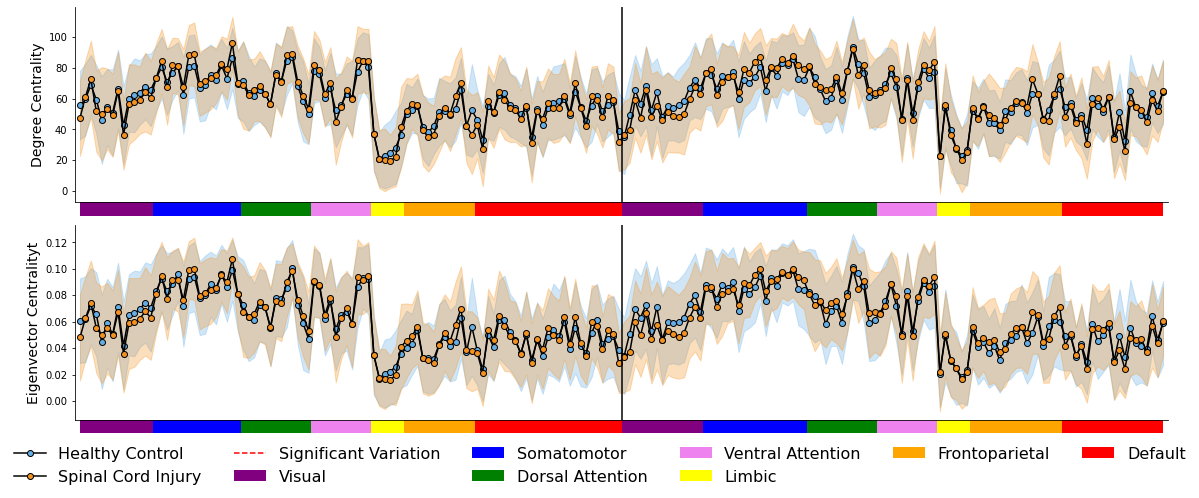

In [10]:
# permutation + multiple comparison (ONE TIME)
# deg
pvals_deg = np.zeros((200,))
for i in range(200):
    pvals_deg[i] = perm_test(deg_l_g1[:,i], deg_l_g2[:,i], 10000)
reject_deg, pvals_corrected_deg, alphacSidak, alphacBonf = smm.multipletests(pvals_deg, 0.01, method='fdr_bh') 
# clc
pvals_clc = np.zeros((200,))
for i in range(200):
    pvals_clc[i] = perm_test(clc_l_g1[:,i], clc_l_g2[:,i], 10000)
reject_clc, pvals_corrected_clc, alphacSidak, alphacBonf = smm.multipletests(pvals_clc, 0.01, method='fdr_bh') 
# eig
pvals_eig = np.zeros((200,))
for i in range(200):
    pvals_eig[i] = perm_test(eig_l_g1[:,i], eig_l_g2[:,i], 10000)
reject_eig, pvals_corrected_eig, alphacSidak, alphacBonf = smm.multipletests(pvals_eig, 0.01, method='fdr_bh') 

np.where(reject_deg)[0]
np.where(reject_clc)[0]
np.where(reject_eig)[0]
#%%
mean_A1 = np.mean(deg_l_g1, axis=0)
std_A1 = np.std(deg_l_g1, axis=0)
mean_A2 = np.mean(deg_l_g2, axis=0)
std_A2 = np.std(deg_l_g2, axis=0)

mean_B1 = np.mean(clc_l_g1, axis=0)
std_B1 = np.std(clc_l_g1, axis=0)
mean_B2 = np.mean(clc_l_g2, axis=0)
std_B2 = np.std(clc_l_g2, axis=0)

mean_C1 = np.mean(eig_l_g1, axis=0)
std_C1 = np.std(eig_l_g1, axis=0)
mean_C2 = np.mean(eig_l_g2, axis=0)
std_C2 = np.std(eig_l_g2, axis=0)

mean_D1 = np.mean(eff_l_g1, axis=0)
std_D1 = np.std(eff_l_g1, axis=0)
mean_D2 = np.mean(eff_l_g2, axis=0)
std_D2 = np.std(eff_l_g2, axis=0)

x = np.arange(len(mean_A1))

fig, (ax1, ax3) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(18, 7))

plt.sca(ax1)
ebA1 = ax1.plot(x, mean_A1, '-ko', label=group_label[0], markerfacecolor=color[0])
ax1.fill_between(x, mean_A1 - std_A1, mean_A1 + std_A1, color=color[0], alpha=0.3)
ebA2 = ax1.plot(x, mean_A2, '-ko', label=group_label[1], markerfacecolor=color[1])
ax1.fill_between(x, mean_A2 - std_A2, mean_A2 + std_A2, color=color[1], alpha=0.3)
plt.ylabel("Degree Centrality", fontweight='normal', fontsize=14)
plt.axvline(x=99.5, color='k', linestyle='-', linewidth=1.5)
for i in np.where(reject_deg)[0]:
    plt.axvline(x=i, color='r', linestyle='--', linewidth=1.5)


plt.xlim([-1, 200])
y_min, y_max = ax1.get_ylim()
h = (y_max-y_min)/15; i = y_min-h # intercept
# ticks and labels along the bottom edge are off
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# Add rectangle objects as tick labels for better visualization
ax1.add_patch(patches.Rectangle((0, i), width=13.5-0, height=h, facecolor='purple', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='red', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='purple', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((180.5, i), width=199-180.5, height=h, facecolor='red', clip_on=False, linewidth = 0))

# =============================================================================
# plt.sca(ax2)
# ebB1 = ax2.plot(x, mean_B1, '-ko', label=group_label[0], markerfacecolor=c1, markersize=5)
# ax2.fill_between(x, mean_B1 - std_B1, mean_B1 + std_B1, color=c1, alpha=0.3)
# ebB2 = ax2.plot(x, mean_B2, '-ko', label=group_label[1], markerfacecolor=c2)
# ax2.fill_between(x, mean_B2 - std_B2, mean_B2 + std_B2, color=c2, alpha=0.3)
# plt.ylabel("Clustering Coeeficient", fontweight='normal', fontsize=14)
# plt.axvline(x=99.5, color='k', linestyle='-', linewidth=1.5)
# for i in np.where(reject_clc)[0]:
#     plt.axvline(x=i, color='r', linestyle='--', linewidth=1.5)
# 
# plt.xlim([-1, 200])
# y_min, y_max = ax2.get_ylim()
# h = (y_max-y_min)/15; i = y_min-h
# plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# ax2.add_patch(patches.Rectangle((0, i), width=13.5-0, height=h, facecolor='purple', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='red', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='purple', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((180.5, i), width=199-180.5, height=h, facecolor='red', clip_on=False, linewidth = 0))
# =============================================================================

plt.sca(ax3)
ebC1 = ax3.plot(x, mean_C1, '-ko', label=group_label[0], markerfacecolor=color[0])
ax3.fill_between(x, mean_C1 - std_C1, mean_C1 + std_C1, color=color[0], alpha=0.3)
ebC2 = ax3.plot(x, mean_C2, '-ko', label=group_label[1], markerfacecolor=color[1])
ax3.fill_between(x, mean_C2 - std_C2, mean_C2 + std_C2, color=color[1], alpha=0.3)
plt.ylabel("Eigenvector Centralityt", fontweight='normal', fontsize=14)
plt.axvline(x=99.5, color='k', linestyle='-', linewidth=1.5)
for i in np.where(reject_eig)[0]:
    plt.axvline(x=i, color='r', linestyle='--', linewidth=1.5)
plt.axvline(x=i, color='r', linestyle='--', linewidth=1.5, label='Significant Variation')

plt.xlim([-1, 200])
y_min, y_max = ax3.get_ylim()
h = (y_max-y_min)/15; i = y_min-h
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax3.add_patch(patches.Rectangle((0, i), width=13.5-0, height=h, facecolor='purple', clip_on=False, linewidth = 0, label='Visual'))
ax3.add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='blue', clip_on=False, linewidth = 0, label='Somatomotor'))
ax3.add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='green', clip_on=False, linewidth = 0, label='Dorsal Attention'))
ax3.add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='violet', clip_on=False, linewidth = 0, label='Ventral Attention'))
ax3.add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0, label='Limbic'))
ax3.add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='orange', clip_on=False, linewidth = 0, label='Frontoparietal'))
ax3.add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='red', clip_on=False, linewidth = 0, label='Default'))
ax3.add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='purple', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((180.5, i), width=199-180.5, height=h, facecolor='red', clip_on=False, linewidth = 0))

# =============================================================================
# plt.sca(ax4)
# ebD1 = ax4.plot(x, mean_D1, '-ko', label=group_label[0], markerfacecolor=c1)
# ax4.fill_between(x, mean_D1 - std_D1, mean_D1 + std_D1, color=c1, alpha=0.3)
# ebD2 = ax4.plot(x, mean_D2, '-ko', label=group_label[1], markerfacecolor=c2)
# ax4.fill_between(x, mean_D2 - std_D2, mean_D2 + std_D2, color=c2, alpha=0.3)
# plt.ylabel("Nodal Efficiency", fontweight='normal', fontsize=14)
# plt.axvline(x=99.5, color='k', linestyle='-', linewidth=1.5, label='L-R Separator')
# for i in np.where(reject_deg)[0]:
#     plt.axvline(x=i, color='r', linestyle='--', linewidth=1.5)
# 
# 
# plt.xlim([-1, 200])
# y_min, y_max = ax4.get_ylim()
# h = (y_max-y_min)/15; i = y_min-h
# plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# ax4.add_patch(patches.Rectangle((0, i), width=13.5-0, height=h, facecolor='purple', clip_on=False, linewidth = 0, label='Visual'))
# ax4.add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='blue', clip_on=False, linewidth = 0, label='Somatomotor'))
# ax4.add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='green', clip_on=False, linewidth = 0, label='Dorsal Attention'))
# ax4.add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='violet', clip_on=False, linewidth = 0, label='Ventral Attention'))
# ax4.add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0, label='Limbic'))
# ax4.add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='orange', clip_on=False, linewidth = 0, label='Frontoparietal'))
# ax4.add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='red', clip_on=False, linewidth = 0, label='Default'))
# ax4.add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='purple', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((180.5, i), width=199-180.5, height=h, facecolor='red', clip_on=False, linewidth = 0))
# =============================================================================

plt.legend(prop={'size':16}, ncol=6, frameon=False, bbox_to_anchor=(.48, -.06), loc='upper center')

# =============================================================================
# # Annotate Subplots in a Figure with A, B, C, D (as well as L & R)
# for n, ax in enumerate((ax1, ax2, ax3, ax4)):
#     ax.text(-0.04, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, 
#             size=18, weight='bold')
#     ax.text(0.258, 1.015, 'L', transform=ax.transAxes, 
#             size=14, weight='regular')
#     ax.text(0.731, 1.015, 'R', transform=ax.transAxes, 
#             size=14, weight='regular')
# =============================================================================

sns.despine(right=True) # removes right and top axis lines (top, bottom, right, left)

# Adjust the layout of the plot
plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/shaded_errorbar'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

plt.show()

#%% finding the hubs
# -----------------------------------------
# based on degree centrality (>=20) of mean corr matrix for density of 5%, 
# the follwing regions are top ~10 percent (hubs)


color = (['purple']*14) + (['blue']*16) + (['green']*13) + (['violet']*11) + (['cream']*6) + (['orange']*13) + (['red']*27) + (['purple']*15) + (['blue']*19) + (['green']*13) + (['violet']*11) + (['cream']*6) + (['orange']*17) + (['red']*19)

dc_g1 = degree.degrees_und(bin_g1_mean)
dc_g2 = degree.degrees_und(bin_g2_mean)

# Group 1  
sig_g1 = np.where(dc_g1 >= 105)[0]
coords_g1 = list(atlas.region_coords[i] for i in sig_g1)
color_g1 = list(color[i] for i in sig_g1)
size_g1 = list(int(dc_g1[i]) for i in sig_g1)
size_g1 = [(x - 80)*15 for x in size_g1]
label_g1 = list(str(i+1) for i in sig_g1)

view = plotting.view_markers( 
    coords_g1, color_g1, marker_size=np.array(size_g1)/15, marker_labels=label_g1) # marker_labels=labels
view.open_in_browser() 
view.save_as_html("surface_plotG1.html") 

# Group 2  
sig_g2 = np.where(dc_g2 >= 105)[0]
coords_g2 = list(atlas.region_coords[i] for i in sig_g2)
color_g2 = list(color[i] for i in sig_g2)
size_g2 = list(int(dc_g2[i]) for i in sig_g2)
size_g2 = [(x - 80)*15 for x in size_g2]
label_g2 = list(str(i+1) for i in sig_g2)

view = plotting.view_markers( 
    coords_g2, color_g2, marker_size=np.array(size_g2)/15, marker_labels=label_g2) 
view.open_in_browser() 
view.save_as_html("surface_plotG2.html")


<ipython-input-11-9f7fd1254ecf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axx1 = sns.distplot(dc_g1, color='orange', label=group_label[0], **kwargs)
<ipython-input-11-9f7fd1254ecf>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axx2 = sns.distplot(dc_g2, color='green', label=group_label[1], **kwargs) # distplot 

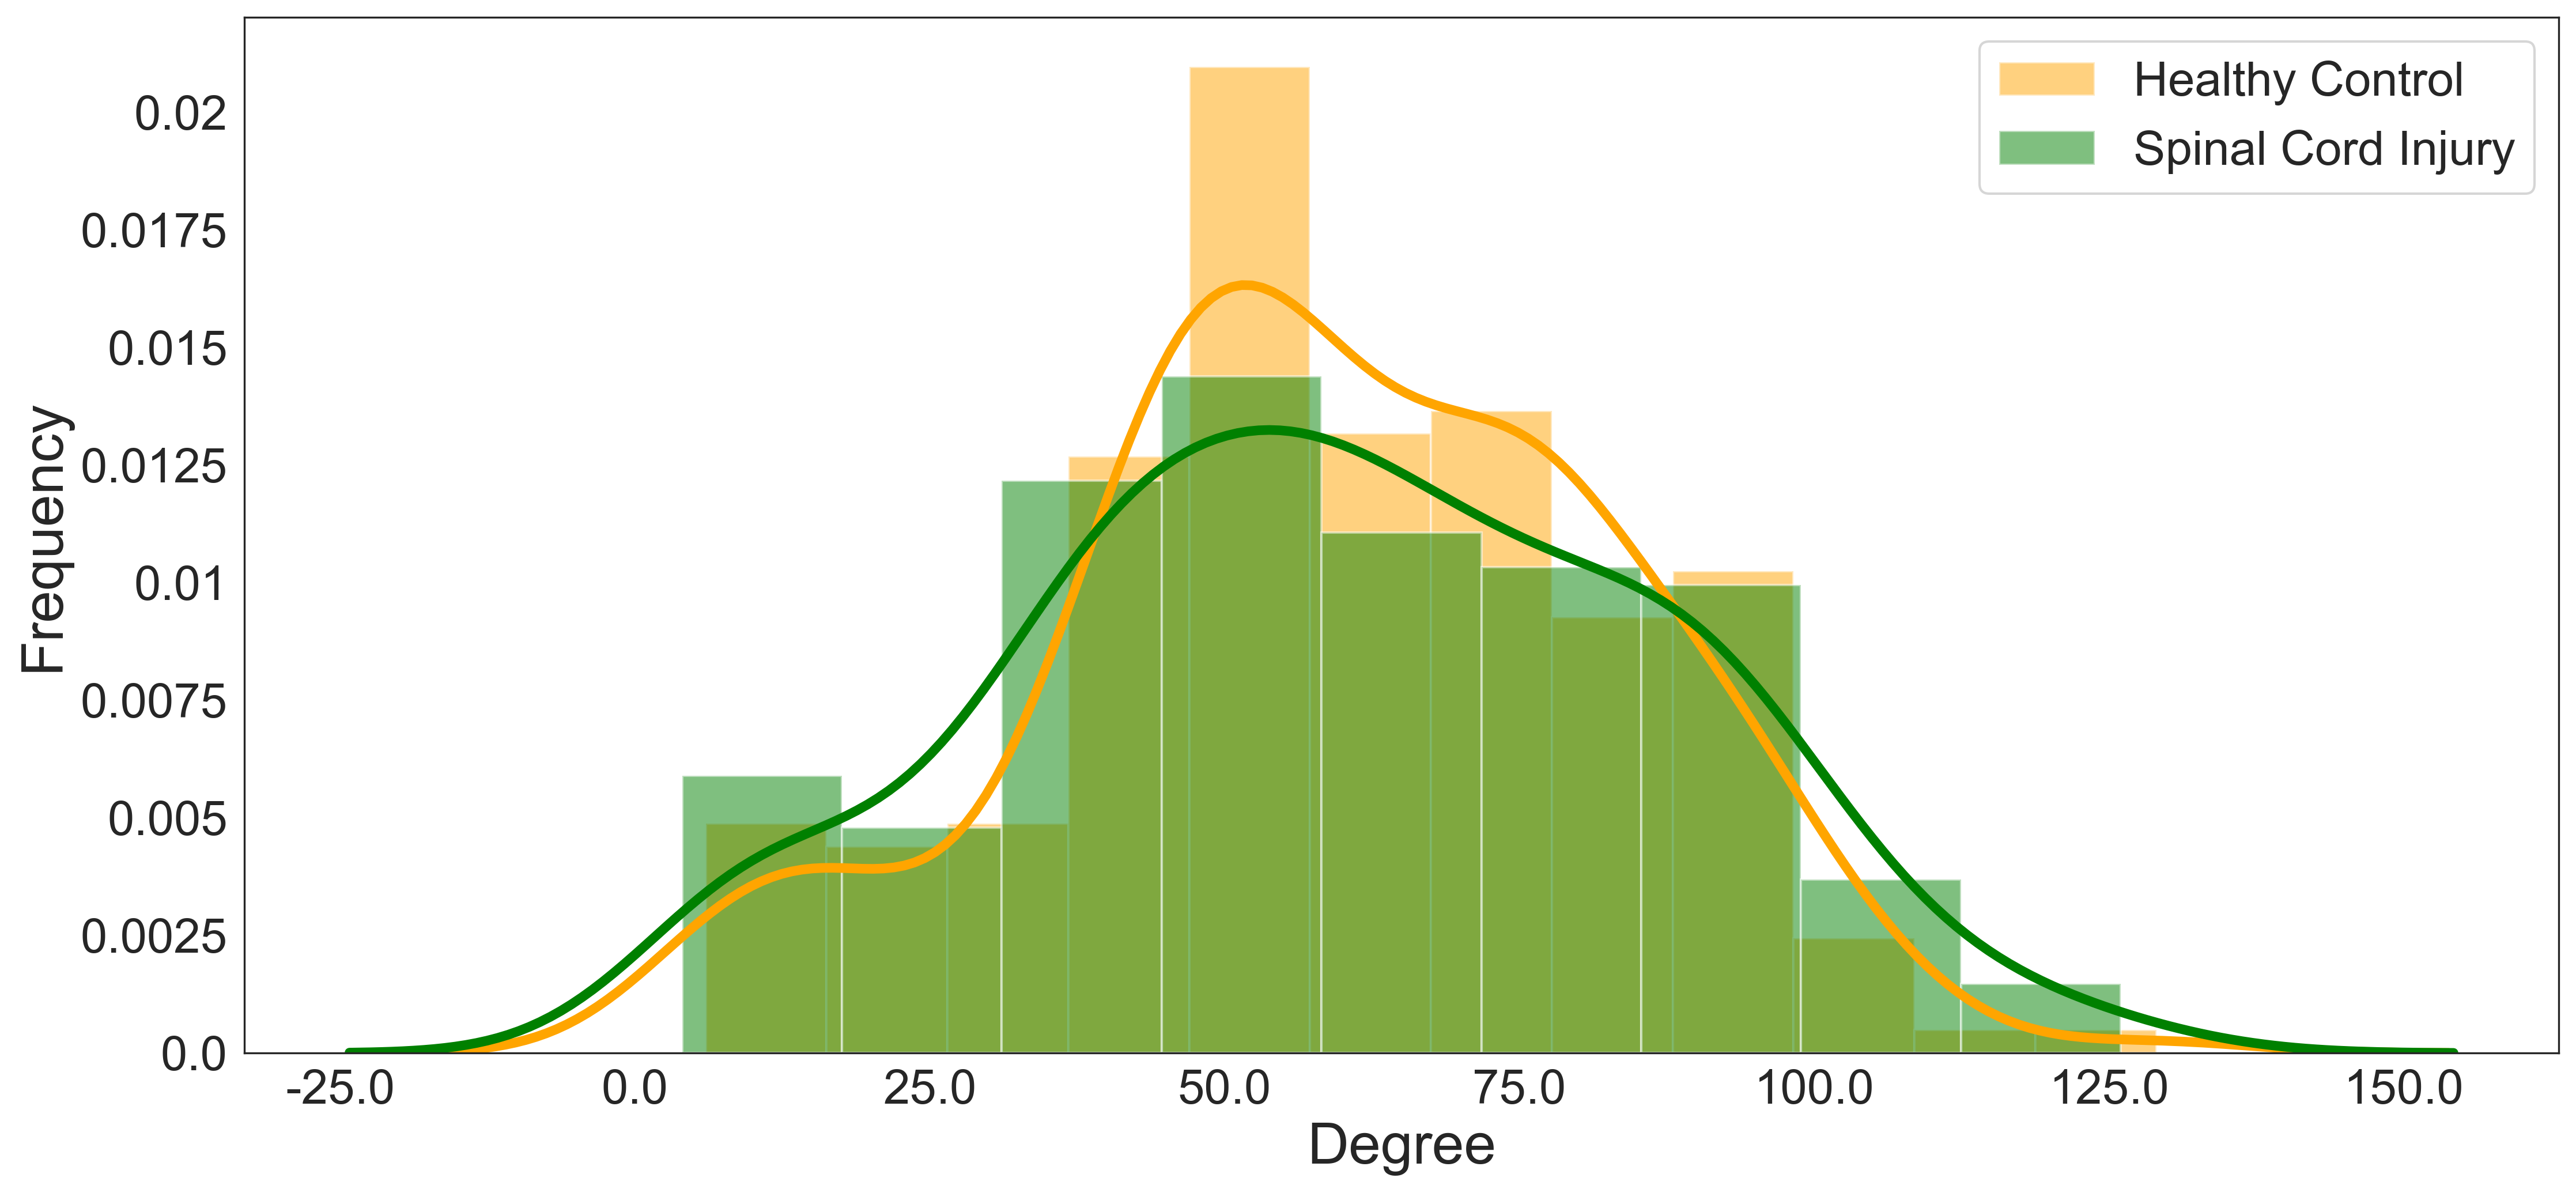

In [11]:
#%% 1.2) Distributions (degrees))
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':4})
plt.figure(figsize=(15,7), dpi= 300)
plt.ylabel('Frequency', fontsize=24)
plt.xlabel('Degree', fontsize=24)
axx1 = sns.distplot(dc_g1, color='orange', label=group_label[0], **kwargs)
axx2 = sns.distplot(dc_g2, color='green', label=group_label[1], **kwargs) # distplot displot
#plt.axvline(x=np.mean(list(dc_g1)), linestyle='--', color='blue', label=f"Mean: {np.mean(list(dc_g1)):.5}", linewidth=2)
#plt.axvline(x=np.mean(list(dc_g2)), linestyle='--', color='darkred', label=f"Mean: {np.mean(list(dc_g2)):.5}", linewidth=2)
#plt.xlim(-0.05, 0.9) # cp

axx1.set_xticklabels([str(i) for i in axx1.get_xticks()], fontsize = 20)
axx2.set_yticklabels([str(i) for i in axx2.get_yticks()], fontsize = 20)

# axx1.set_yticklabels(axx1.get_yticks(), size = 20) 
# axx1.set_xticklabels(axx1.get_xticks(), size = 20) 
plt.legend(prop={'size':20})

# Adjust the layout of the plot
plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/dist_'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

### G1 Modularity data

In [12]:
#%% MODULARITY

n_set = 2

# import community assignment of all groups S_hc_0.5,0.0 S_hc_0.5,-1.0
# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_hc_1.2,-1.0.mat', squeeze_me=True)['S_g1']; #S_hc
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_sci_1.2,-1.0.mat', squeeze_me=True)['S_g2']; #S_sci

# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/Sm_hc_1.2,-1.0.mat', squeeze_me=True)['S_g1_mode']; #S_hc
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/Sm_sci_1.2,-1.0.mat', squeeze_me=True)['S_g2_mode']; #S_sci

S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/var_s1_mode.mat', squeeze_me=True)['S_g1_mode']; #S_hc
S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/var_s2_mode.mat', squeeze_me=True)['S_g2_mode']; #S_sci


# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_hc_1.1,-1.0.mat', squeeze_me=True)['S_g1']; #S_hc
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_sci_1.1,-1.0.mat', squeeze_me=True)['S_g2']; #S_sci
communities = [S_g1, S_g2]

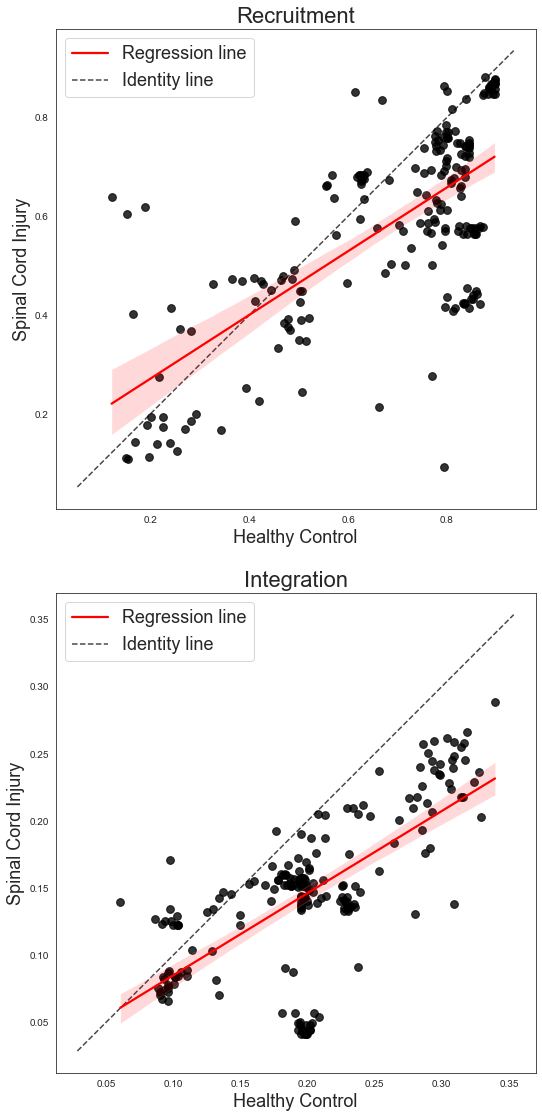

In [13]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# create static communities (networks' labels)
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
static_communities = np.zeros((200,))
# find networks in atlas.labels and assign a label[1-7] to each
for i, network in enumerate(networks):   
    idx = np.array([network in s for s in labels], dtype=bool)
    static_communities[idx] = i+1 # 1-7

allegiance, flexibility, integration, recruitment, promiscuity = [], [], [], [], []
allegiance_coarse = []

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]]) # Any override variable  ?

def create_coarse_allegiance(allegiance):
    allegiance_coarse_lr = np.zeros((14,14))
    p1, q1 = 0, 0
    for i, p2 in enumerate(pivot):
        for j, q2 in enumerate(pivot):
            allegiance_coarse_lr[i,j] = np.nanmean(allegiance[p1:p2+1, q1:q2+1])
            q1 = q2+1
        p1 = p2+1
        q1 = 0    
    # If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
    allegiance_coarse = np.mean(allegiance_coarse_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)   
    return allegiance_coarse

for s in range(n_set):
    
    allegiance.append(communitymeasures.allegiance(communities[s]))  
    flexibility.append(communitymeasures.flexibility(communities[s]))
    integration.append(communitymeasures.integration(communities[s], static_communities))
    recruitment.append(communitymeasures.recruitment(communities[s], static_communities))
    promiscuity.append(communitymeasures.promiscuity(communities[s])) # 0 entails only 1 community. 1 entails all communities
    allegiance_coarse.append(create_coarse_allegiance(allegiance[s]))
        
#plt.imshow(allegiance_coarse[1])
#plt.colorbar()

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc




#%% plot regressions (scatter)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 16))
sns.set(style = 'white') # whitegrid
# recruitment
x_rec = recruitment[0]
y_rec = recruitment[1]
sns.regplot(x=x_rec, y=y_rec, ci=95, scatter_kws={"color":"black", "s": 60}, line_kws={"color":"red", 'label':'Regression line'}, ax=ax1)
ax1.set_xlabel(group_label[0], fontsize=18) 
ax1.set_ylabel(group_label[1], fontsize=18)
ax1.set_title('Recruitment', fontsize=22)
lims = [np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()])]  # max of both axes
ax1.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
ax1.axis('square') # scaled, equal, square
#ax1.collections[1].set_label('95% CI')
ax1.legend(loc="best", fontsize=18)
perm_test(x_rec, y_rec, 30000)

# integration
x_in = integration[0]
y_in = integration[1]
sns.regplot(x=x_in, y=y_in, ci=95, scatter_kws={"color": "black", "s": 60}, line_kws={"color": "red", 'label':'Regression line'}, ax=ax2)
y_min, y_max = ax2.get_ylim()
x_min, x_max = ax2.get_xlim()
ax2.set_xlabel(group_label[0], fontsize=18) 
ax2.set_ylabel(group_label[1], fontsize=18)
ax2.set_title('Integration', fontsize=22)
lims = [np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
        np.max([ax2.get_xlim(), ax2.get_ylim()])]  # max of both axes
ax2.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
ax2.axis('square') # scaled, equal, square
#ax2.collections[1].set_label('95% CI')
ax2.legend(loc="best", fontsize=18)
perm_test(x_in, y_in, 30000)

plt.tight_layout(pad=2.0) # spacing between subplots
plt.show()

fig.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/scatter_int&rec'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/recruitment_control.npy', recruitment[0])
np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/integration_control.npy', integration[0])
 


In [14]:
#%% finding significant (diff_integration)
# -----------------------------------------
#%% define permutation test on integration


def perm_test_integration(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    int_s1 = communitymeasures.integration(s1, static_communities)
    int_s2 = communitymeasures.integration(s2, static_communities)
    diff = np.abs(int_s2 - int_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        int_sp1 = communitymeasures.integration(sp1, static_communities)
        int_sp2 = communitymeasures.integration(sp2, static_communities)
        k += diff < np.abs(int_sp2 - int_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

def perm_test_recruitment(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    rec_s1 = communitymeasures.recruitment(s1, static_communities)
    rec_s2 = communitymeasures.recruitment(s2, static_communities)
    diff = np.abs(rec_s2 - rec_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
        rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
        k += diff < np.abs(rec_sp2 - rec_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc


# run for a given permutation number (nmc)
pvalue_int = perm_test_integration(S_g1, S_g2, nmc=100) ## S_g1 S_g2_sci
pvalue_rec = perm_test_recruitment(S_g1, S_g2, nmc=100) ## ## S_g1 S_g2_sci


# Automatic atlas fetching
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]
label = atlas.labels.astype('U') # covert array of bytes to array of strings

color = (['purple']*14) + (['blue']*16) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*13) + (['red']*27) + (['purple']*15) + (['blue']*19) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*17) + (['red']*19)


permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90


In [68]:
# diff_rec = abs(recruitment[0] - recruitment[1])
# diff_int = abs(integration[0] - integration[1])

diff_rec = recruitment[0] - recruitment[1]
diff_int = integration[0] - integration[1] # if -ve coef-SCI is bigger, if +ve coef-HC is bigger
# diff_int = integration[1] - integration[0]

# Recruitment 
sig_rec = np.where((diff_rec >= 0.2) & (pvalue_rec == 0))[0] # -np.sort(-diff_rec)[10]
coords_g1 = list(atlas.region_coords[i] for i in sig_rec)
color_g1 = list(color[i] for i in sig_rec)
labels = list(label[i] for i in sig_rec)
label_g1 = list(str(i+1) for i in sig_rec)
size = list(diff_rec[i] for i in sig_rec)
size_g1 = [int(x*100) for x in size]

size_g1a = ['+' + str(x)  for x in size_g1]

view = plotting.view_markers( 
    coords_g1, color_g1, marker_size=np.array(size_g1)) # marker_labels=labels
view.open_in_browser() 
view.save_as_html('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/diff_recruitment_'+analysis+'.html') 


# Integration 
sig_int = np.where((diff_int >= 0.1) & (pvalue_int == 0))[0] # -np.sort(-diff_int)[10]
coords_g2 = list(atlas.region_coords[i] for i in sig_int)
color_g2 = list(color[i] for i in sig_int)
labels = list(label[i] for i in sig_int)
label_g2 = list(str(i+1) for i in sig_int)
size = list(diff_int[i] for i in sig_int)
size_g2 = [int(x*200) for x in size]
size_g2a = ['+' + str(x) for x in size_g2]
view = plotting.view_markers( 
    coords_g2, color_g2, marker_size=np.array(size_g2)) # marker_labels=labels
view.open_in_browser() 
# view.savefig('rs.tif',dpi=300)
view.save_as_html('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/diff_integration_'+analysis+'.html') 
# view

In [49]:
# print(f'1{np.shape(label_g2)}-{np.shape(coords_g2)}\n - {size_g2}\n')
# np.min(diff_int)
# print(f'{diff_int} \n\n{diff_rec}')
# {len(diff_rec)}
# x_r = [x for x in diff_rec if (x >= 0.2) & (pvalue_rec == 0) ] #(diff_rec >= 0.2)
x_r = [x for x, p in zip(diff_rec, pvalue_rec) if (x >= 0.2) and (p == 0)]
# y_r = [x for x, p in zip(diff_rec, pvalue_rec) if (x >= 0.2) and (p == 0)]
# y_r = [x for x in diff_rec if x < 0]

print(f'{x_r} \n\n{len(diff_rec)} {len(x_r)}')
# x_rec
# size(coords_g1)
# type(x_rec)

[0.4038217530325331, 0.4029652844744455, 0.444982997513069, 0.4316030553722782, 0.41854032380855705, 0.4188004364817541, 0.24965106836522344, 0.38578515962036214, 0.2443599959397046, 0.28692965538242887, 0.28043318276404605, 0.28894711465259093, 0.22006166573618247, 0.29036187382632084, 0.2926838552504696, 0.26408973252804147, 0.4491659476560252, 0.492296314556884, 0.7031513209252641, 0.21456584830182757, 0.41170126376693916, 0.38004364817540476, 0.4128241892097649, 0.41081941836268565, 0.41325559559457964, 0.4082246358422576, 0.41647845505760556, 0.36482388468761096, 0.20048977313099503, 0.25236004669339673, 0.294955082982287, 0.25867888138862094, 0.275402223011724, 0.27075826016342697, 0.2253654265847841, 0.2686900472009339, 0.2772039790894786, 0.29539283357864277, 0.26897229412328627] 

200 39


In [67]:

xx = ['0.63', '0.77', '0.79', '0.39', '0.57', '0.46']
yy = ['3.06', '4.04', '1.82', '2.25', '-0.73', '2.24' ]
group = ['A', 'A', 'B', 'A', 'A', 'B']

xx = np.array(xx)
yy = np.array(yy)

# Data set
df = {'x': xx, 'y': xy, 'group': group}

sns.lmplot(x = xx, y = xx, hue = "group", data = df)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
## Scartered Plots

diff_rec = recruitment[0] - recruitment[1] # if -ve coef-SCI is bigger, if +ve coef-HC is bigger
# diff_int = integration[0] - integration[1] 

#%% plot regressions (scatter)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 16))
sns.set(style = 'white') # whitegrid


# recruitment
x_rec = recruitment[0] # rec that are significantly diff in HC
y_rec = recruitment[1] # rec that are significantly diff in SCI
# diff_int diff_rec
# x_rec = [x for x in diff_rec if x > 0]
# y_rec = [x for x in diff_rec if x < 0]

x_rec_hc = list(diff_rec for i in x_rec)
y_rec_sci = list(diff_rec for i in x_rec)

x_rec_hc = np.array(x_rec_hc)
y_rec_sci = np.array(y_rec_sci)

# sigDiff_rec = np.where((diff_rec >= 0.2) & (pvalue_rec == 0))[0] # sig_rec

x_r = [x for x, p in zip(diff_rec, pvalue_rec) if (x >= 0.2) and (p == 0)]
print(f'sigDiff_rec: {x_r}')


# integration
x_in = integration[0]
y_in = integration[1]

sigDiff_rec: [ 14  15  16  17  18  19  20  21  22  23  25  26  27  28  29  34  45  52
  53  59 115 116 117 118 119 120 121 122 123 124 125 126 128 129 130 131
 132 133 188]


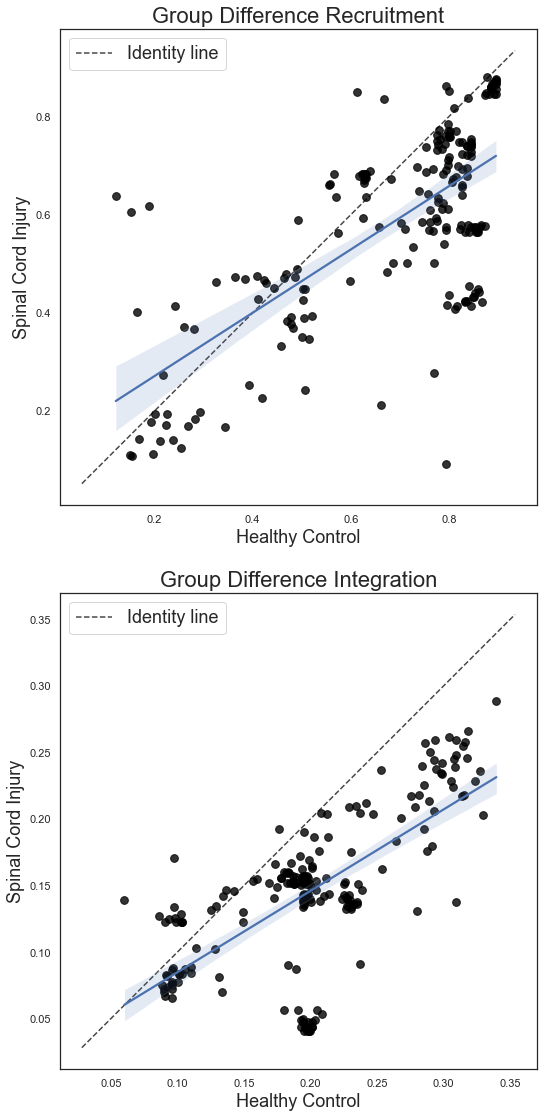

In [60]:


# coords_g1 = list(atlas.region_coords[i] for i in sig_rec)


# sig_rec = np.where((diff_rec >= 0.2) & (pvalue_rec == 0))[0] # -np.sort(-diff_rec)[10]

sns.regplot(x=x_rec, y=y_rec, ci=95, scatter_kws={"color":"black", "s": 60}, ax=ax1) # line_kws={"color":"red", 'label':'Regression line'},
ax1.set_xlabel(group_label[0], fontsize=18) 
ax1.set_ylabel(group_label[1], fontsize=18)
ax1.set_title('Group Difference Recruitment', fontsize=22)
lims = [np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()])]  # max of both axes
ax1.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
ax1.axis('square') # scaled, equal, square
#ax1.collections[1].set_label('95% CI')
ax1.legend(loc="best", fontsize=18)
# perm_test(x_rec, y_rec, 30000)

# integration
# x_in = integration[0]
# y_in = integration[1]
sns.regplot(x=x_in, y=y_in, ci=95, scatter_kws={"color": "black", "s": 60}, ax=ax2)# 
y_min, y_max = ax2.get_ylim()
x_min, x_max = ax2.get_xlim()
ax2.set_xlabel(group_label[0], fontsize=18) 
ax2.set_ylabel(group_label[1], fontsize=18)
ax2.set_title('Group Difference Integration', fontsize=22)
lims = [np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
        np.max([ax2.get_xlim(), ax2.get_ylim()])]  # max of both axes
ax2.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
ax2.axis('square') # scaled, equal, square
#ax2.collections[1].set_label('95% CI')
ax2.legend(loc="best", fontsize=18)
# perm_test(x_in, y_in, 30000)

plt.tight_layout(pad=2.0) # spacing between subplots groupDiffScatter
plt.show()

fig.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/groupDiffScatter'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)


0
1
2
3
4
5
6
7
8
9
permutation #:  0
permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
permutation #:  100
permutation #:  110
permutation #:  120
permutation #:  130
permutation #:  140
permutation #:  150
permutation #:  160
permutation #:  170
permutation #:  180
permutation #:  190
permutation #:  200
permutation #:  210
permutation #:  220
permutation #:  230
permutation #:  240
permutation #:  250
permutation #:  260
permutation #:  270
permutation #:  280
permutation #:  290
permutation #:  300
permutation #:  310
permutation #:  320
permutation #:  330
permutation #:  340
permutation #:  350
permutation #:  360
permutation #:  370
permutation #:  380
permutation #:  390
permutation #:  400
permutation #:  410
permutation #:  420
permutation #:  430
permutation #:  440
permutation #:  450
permutation #:  460
permutation #:  470
permutation #

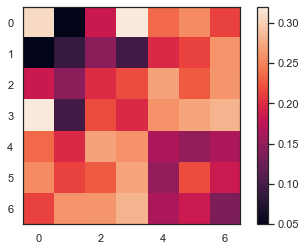

In [15]:
#%% MODULARITY + permutation -> create null distribution

# number of permutations
n_perm = 10

# create list of list for modularity variables (e.g., allegiance ...)
allegiance_perm = flexibility_perm = integration_perm = recruitment_perm = [[] for i in range(n_perm)]

# @autojit
# def parallel_sum(A):
#     sum = 0.0
#     for i in prange(A.shape[0]):
#         sum += A[i]

#     return sum

for i in range(n_perm):
    
    # permute/shuffle community assignment among both groups
    S_perm = np.random.permutation(np.concatenate((S_g1, S_g2), axis=1).T).T
    S_perm_g1 = S_perm[:,:np.shape(S_g1)[1]]
    S_perm_g2 = S_perm[:,np.shape(S_g1)[1]:]
    communities_perm = [S_perm_g1, S_perm_g2]
    
    for s in range(n_set):
        
        allegiance_perm[i].append(communitymeasures.allegiance(communities_perm[s]))  
        #flexibility_perm[i].append(communitymeasures.flexibility(communities_perm[s]))
        #integration_perm[i].append(communitymeasures.integration(communities_perm[s], static_communities))
        #recruitment_perm[i].append(communitymeasures.recruitment(communities_perm[s], static_communities))
        
    print(i)

#%% define permutation test on allegiance matrices using monte-carlo method
def perm_test_allegiance(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    diff = np.abs(alg_s2 - alg_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T # Why do we randomiz this ?
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        k += diff < np.abs(alg_sp2 - alg_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

def perm_test_allegiance_coarse(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    alg_s1_coarse = create_coarse_allegiance(alg_s1)
    alg_s2_coarse = create_coarse_allegiance(alg_s2)
    diff = np.abs(alg_s2_coarse - alg_s1_coarse)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        alg_sp1_coarse = create_coarse_allegiance(alg_sp1)
        alg_sp2_coarse = create_coarse_allegiance(alg_sp2)
        k += diff < np.abs(alg_sp2_coarse - alg_sp1_coarse)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

# run for a given permutation number (nmc)
pvalue = perm_test_allegiance(S_g1, S_g2, nmc=10)  
pvalue_c = perm_test_allegiance_coarse(S_g1, S_g2, nmc=1000)

# pvalue = perm_test_allegiance_parallel(S_g1, S_g2, nmc=10) # another pvalue var exist ?
# pvalue_c = perm_test_allegiance_coarse_parallel(S_g1, S_g2, nmc=1000)

pvalue_lr = np.zeros((14,14))
pvalue_coarse = np.zeros((7,7))

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]])

# create coarse allegiance metrices
p1, q1 = 0, 0
for i, p2 in enumerate(pivot): 
    for j, q2 in enumerate(pivot): 
        pvalue_lr[i,j] = np.nanmean(pvalue[p1:p2+1, q1:q2+1])
        q1 = q2+1
    p1 = p2+1
    q1 = 0
    
    
# from numba import autojit, prange
# https://stackoverflow.com/questions/4682429/parfor-for-python

# @autojit
# def parallel_sum(A):
#     sum = 0.0
#     for i in prange(A.shape[0]):
#         sum += A[i]

#     return sum

# If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
pvalue_coarse = np.mean(pvalue_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)    
    
#%%
pvalue_int = perm_test_integration(S_g1, S_g2, nmc=100)
# pvalue_int = perm_test_integration_parallel(S_g1, S_g2, nmc=100, static_communities)

plt.imshow(pvalue_coarse)
plt.colorbar()

#%%


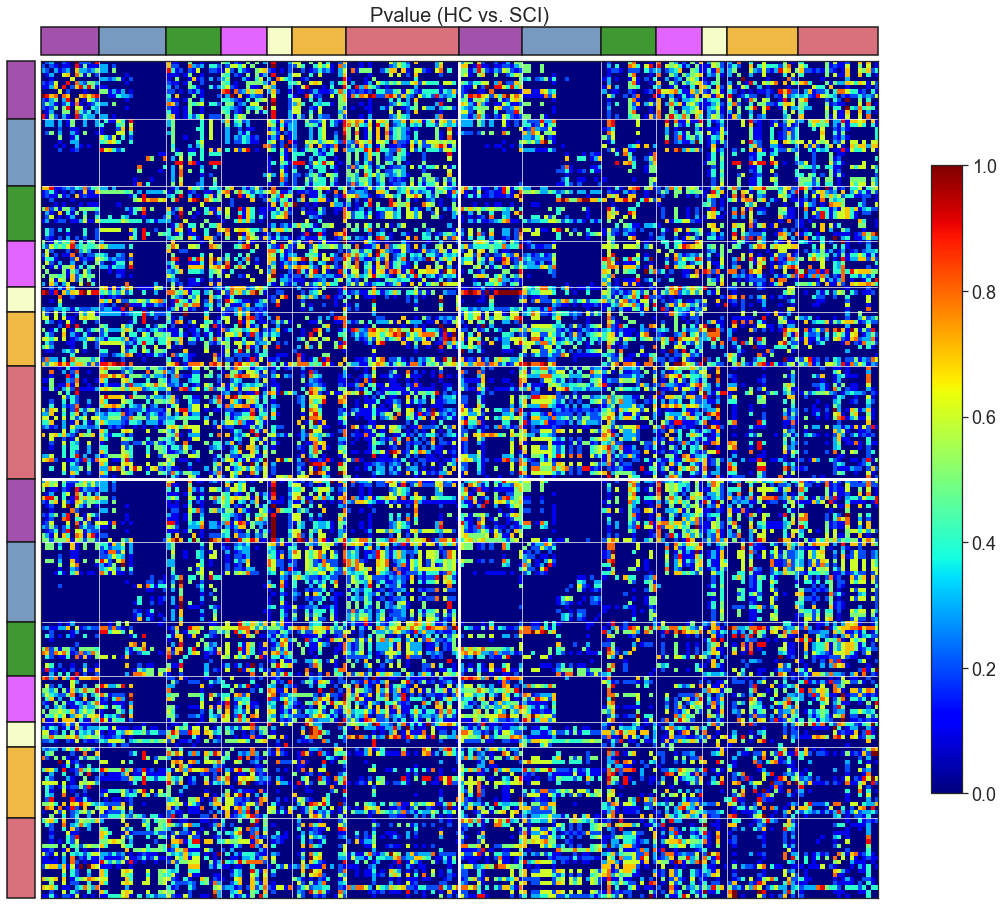

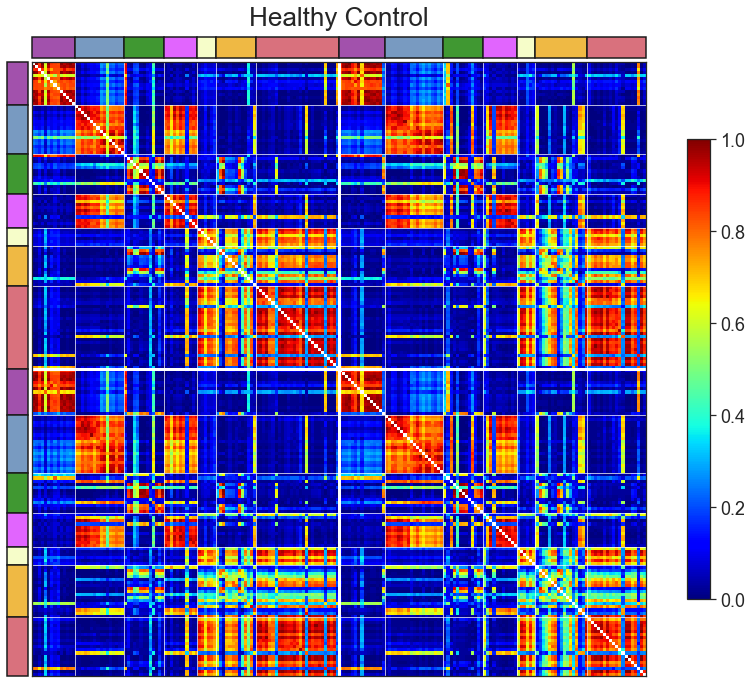

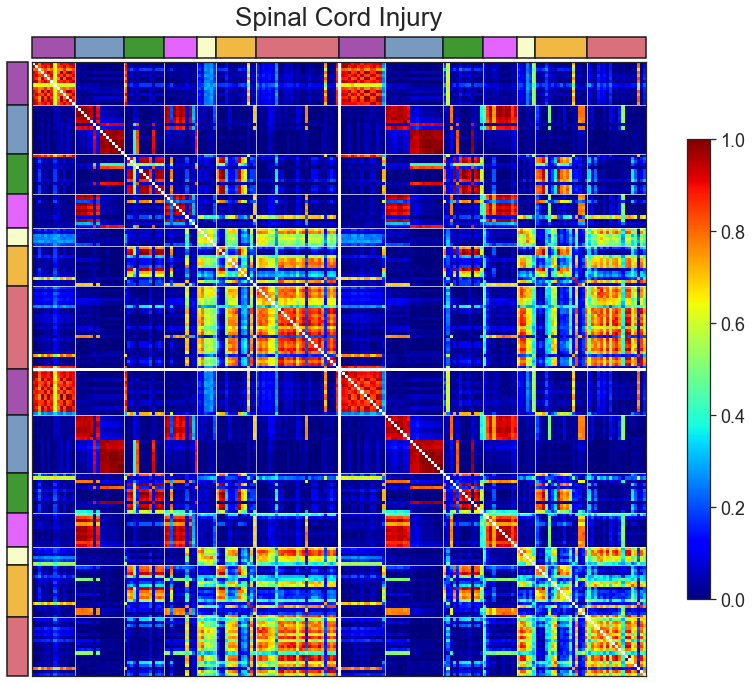

In [16]:
# plot pvalue
cmap='jet' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# Healthy Control
f = plt.figure(figsize=(19,15))
plt.matshow(pvalue, fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title('Pvalue (HC vs. SCI)', fontsize=20, y=1.04)
# plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
# plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white',linewidth=3)
plt.axhline(y=100-0.5,color='white',linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/pvalue_diff.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc

# # plot regressions
# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 20))
# sns.set(style = 'white') # whitegrid
# # recruitment
# x_r = recruitment[0]
# y_r = recruitment[1]
# sns.regplot(x=x_r, y=y_r, ci=95, scatter_kws={"color":"black", "s": 20}, line_kws={"color":"red", 'label':'Regression line'}, ax=ax1)
# ax1.set_xlabel('Healthy Control', fontsize=18) # fontsize=20
# ax1.set_ylabel('Spinal Cord Injury', fontsize=18)
# ax1.set_title('Recruitment', size='medium')
# lims = [np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
#         np.max([ax1.get_xlim(), ax1.get_ylim()])]  # max of both axes
# ax1.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
# ax1.axis('square') # scaled, equal, square
# #ax1.collections[1].set_label('95% CI')
# ax1.legend(loc="best", fontsize=16)
# perm_test(x_r, y_r, 30000)

# # integration
# x_i = integration[0]
# y_i = integration[1]
# sns.regplot(x=x_i, y=y_i, ci=95, scatter_kws={"color": "black", "s": 20}, line_kws={"color": "red", 'label':'Regression line'}, ax=ax2)
# y_min, y_max = ax2.get_ylim()
# x_min, x_max = ax2.get_xlim()
# ax2.set_xlabel('Healthy Control', fontsize=18) # fontsize=20
# ax2.set_ylabel('Spinal Cord Injury', fontsize=18)
# ax2.set_title('Integration', size='medium')
# lims = [np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
#         np.max([ax2.get_xlim(), ax2.get_ylim()])]  # max of both axes
# ax2.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
# ax2.axis('square') # scaled, equal, square
# #ax2.collections[1].set_label('95% CI')
# ax2.legend(loc="best", fontsize=16)
# perm_test(x_i, y_i, 30000)

# plt.tight_layout(pad=2.0) # spacing between subplots
# plt.show()

# fig.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/scatter_int&rec_'+analysis+'.pdf',
#             bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

#%% Allegiance matrix plots
cmap='jet' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# Group 1
f = plt.figure(figsize=(15,11))
plt.matshow(allegiance[0], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title(group_label[0], fontsize=26, y=1.05)
#plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb=plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white', linewidth=3)
plt.axhline(y=100-0.5,color='white', linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/allegiance_g1'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# Group 2
f = plt.figure(figsize=(15,11))
plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title(group_label[1], fontsize=26, y=1.05)
#plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white',linewidth=3)
plt.axhline(y=100-0.5,color='white',linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/allegiance_g2'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

## recruitment and integration coeeficiencts for each brain region

node_coords = np.array([(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)])

# ## recruitment (G1 vs G2)
# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# node_values = recruitment[0]; plotting.plot_markers(node_values, node_coords, node_cmap=cmap, title=None, colorbar=True, axes=ax1)
# ax1.set_title('Recruitment', size='medium') # fontsize=20
# node_values = recruitment[1]; plotting.plot_markers(node_values, node_coords, node_cmap=cmap, title=None, colorbar=True, axes=ax2)
# #plt.tight_layout()
# plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/recruitment_'+analysis+'.pdf',
#             bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# ## integration (HC vs SCI)
# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# node_values = integration[0]; plotting.plot_markers(node_values, node_coords, node_cmap=cmap, title=None, colorbar=True, axes=ax1)
# ax1.set_title('Integration', size='medium') # fontsize=20
# node_values = integration[1]; plotting.plot_markers(node_values, node_coords, node_cmap=cmap, title=None, colorbar=True, axes=ax2)
# #plt.tight_layout()
# plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/integration_'+analysis+'.pdf',
#             bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)



In [17]:
# def perm_test_allegiance(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     alg_s1 = communitymeasures.allegiance(s1)
#     alg_s2 = communitymeasures.allegiance(s2)
#     diff = np.abs(alg_s2 - alg_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T # Why do we randomiz this ?
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         alg_sp1 = communitymeasures.allegiance(sp1)
#         alg_sp2 = communitymeasures.allegiance(sp2)
#         k += diff < np.abs(alg_sp2 - alg_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

# pvalue_list = []

# n_set = 2

# # import community assignment of all groups S_hc_0.5,0.0 S_hc_0.5,-1.0
# # S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_hc_1.2,-1.0.mat', squeeze_me=True)['S_g1']; #S_hc
# # S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_sci_1.2,-1.0.mat', squeeze_me=True)['S_g2']; #S_sci

# # S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_hc_1.1,-1.0.mat', squeeze_me=True)['S_g1']; #S_hc
# # S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_sci_1.1,-1.0.mat', squeeze_me=True)['S_g2']; #S_sci
# # communities = [S_g1, S_g2]

In [18]:
# pvalue = perm_test_allegiance(S_g1, S_g2, nmc=10)

# os.chdir('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/')



In [19]:


# os.chdir('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/')
# # pvalue_c
# # save pvalue to csv file
# # pvalue.shape
# # pvalue

# pvalue_list = []

# np.savetxt('pvalue.csv', pvalue, delimiter=',')

# array_list.append(array)



# array_list = []

# # Loop to generate 10 different 200 by 200 arrays
# for _ in range(10):
#     array = np.random.rand(200, 200)  # Replace this with your data generation logic
#     array_list.append(array)

# # Convert the list of arrays to a 3D NumPy array
# all_arrays = np.array(array_list)

# # Calculate mean and variance
# mean_array = np.mean(all_arrays)
# variance_array = np.var(all_arrays)

# # Print the results
# print(f"Mean: {mean_array}")
# print(f"Variance: {variance_array}")

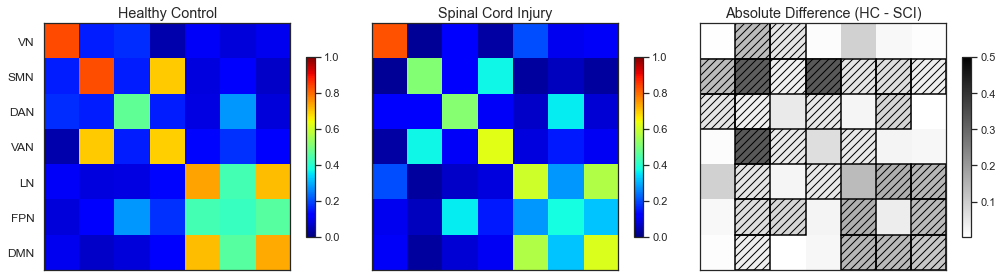

In [20]:
#%% Coarse Allegiance matrix plots (Functional Cartography)

networks_lr = ['Vis_L', 'SomMot_L', 'DorsAttn_L', 'SalVentAttn_L', 'Limbic_L', 'Cont_L', 'Default_L', 'Vis_R', 'SomMot_R', 'DorsAttn_R', 'SalVentAttn_R', 'Limbic_R', 'Cont_R', 'Default_R']
networks = ['VN', 'SMN', 'DAN', 'VAN', 'LN', 'FPN', 'DMN']
cmap='jet' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap, seismic

# pvalue_c = perm_test_allegiance_coarse(S_g1, S_g2, nmc=1000)

# pvalue = np.array([[0.   , 0.   , 0.001, 0.003, 0.   , 0.052, 0.013],
#        [0.   , 0.   , 0.   , 0.   , 0.007, 0.002, 0.023],
#        [0.001, 0.   , 0.   , 0.271, 0.681, 0.   , 0.025],
#        [0.003, 0.   , 0.271, 0.   , 0.423, 0.   , 0.158],
#        [0.   , 0.007, 0.681, 0.423, 0.007, 0.087, 0.   ],
#        [0.052, 0.002, 0.   , 0.   , 0.087, 0.26 , 0.219],
#        [0.013, 0.023, 0.025, 0.158, 0.   , 0.219, 0.   ]]) 

# Find the indices of cells that are equal to 0
sig_cells = np.argwhere(pvalue_c == 0)

# Define hatching properties
hatch_props = dict(color="black", alpha=1.0, linewidth=1.5, hatch="///")

fig, axes = plt.subplots(ncols=3, figsize=(18,6))

# G1 (e.g., HC)
im1 = axes[0].imshow(allegiance_coarse[0], vmin=0, vmax=1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
axes[0].set_title(group_label[0], size='large')
axes[0].set_yticks(range(allegiance_coarse[0].shape[1]))
axes[0].set_yticklabels(networks, fontsize=12, rotation=0)
axes[0].tick_params(left=False,right=False,bottom=False,top=False,
                labelleft=True, labelright=False, labelbottom=False, labeltop=False)
# Add colorbar for G1
cbar1 = fig.colorbar(im1, ax=axes[0], shrink=0.5)

# G2 (e.g., SCI)
im2 = axes[1].imshow(allegiance_coarse[1], vmin=0, vmax=1, cmap=cmap)
axes[1].set_title(group_label[1], size='large')
axes[1].set_yticks(range(allegiance_coarse[0].shape[1]))
axes[1].set_yticklabels(networks, fontsize=12, rotation=0)
axes[1].tick_params(left=False,right=False,bottom=False,top=False,
                labelleft=False, labelright=False, labelbottom=False, labeltop=False)
# Add colorbar for G2
cbar2 = fig.colorbar(im2, ax=axes[1], shrink=0.5)

# Calculate the absolute difference between the two matrices
diff = np.abs(allegiance_coarse[0] - allegiance_coarse[1])
# Create a new subplot for the difference
im3 = axes[2].imshow(diff, vmax=.5, cmap='binary')
axes[2].set_title('Absolute Difference (HC - SCI)', size='large')
axes[2].set_yticks(range(allegiance_coarse[0].shape[1]))
axes[2].set_yticklabels(networks, fontsize=12, rotation=0)
axes[2].tick_params(left=False, right=False, bottom=False, top=False,
                labelleft=False, labelright=False, labelbottom=False, labeltop=False)
# Add hatching to significant cells
for cell in sig_cells:
    plt.gca().add_patch(Rectangle((cell[1]-0.5, cell[0]-0.5), 1, 1, fill=False, **hatch_props))
# Add colorbar for difference
cbar3 = fig.colorbar(im3, ax=axes[2], shrink=0.5)

# =============================================================================
# # Set the label for each colorbar
# cbar1.set_label('Allegiance')
# cbar2.set_label('Allegiance')
# cbar3.set_label('Difference')
# =============================================================================

plt.tight_layout(pad=3.0) # spacing between subplots

fig.subplots_adjust(right=0.8)

plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/allegiance_net_'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)



In [21]:
# pip install mne.connectivity
#%% Creating Circular flow charts (circos or chord)
# https://mne.tools/mne-connectivity/dev/generated/mne_connectivity.viz.plot_connectivity_circle.html
# https://stackoverflow.com/questions/33388867/creating-circular-flow-charts-circos
# https://www.python-graph-gallery.com/406-chord-diagram_mne

# fig = plt.figure(num=None, figsize=(8, 8), facecolor='black')
# plot_connectivity_circle(conmat, label_names, n_lines=300,
#                          node_angles=node_angles, node_colors=node_colors,
#                          title='All-to-All Connectivity left-Auditory'
#                          'Condition (PLI)', fig=fig)

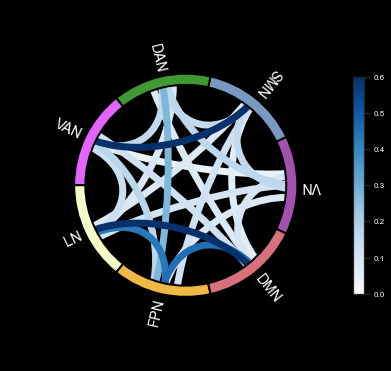

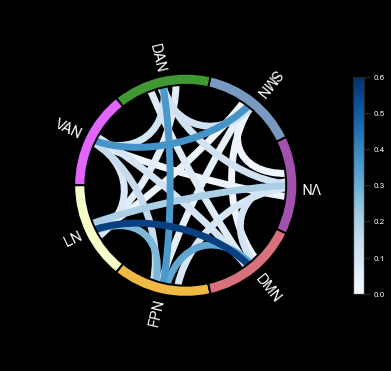

In [22]:
palette = ['purple', 'blue', 'green', 'violet', 'yellow', 'orange', 'red']
palette = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']
node_names = networks # List of labels
cmap = 'Blues' # Blues, hot_r

# facecolor=fig.get_facecolor()
# HC
con_1 = allegiance_coarse[0] # NaN so it doesn't display the weak links
# fig = plt.figure(num=None, figsize=(8, 8), facecolor='white')
fig, ax = plt.subplots(figsize=(8, 8), facecolor="black", subplot_kw=dict(polar=True))
plot_connectivity_circle(con_1, node_names, title=None, textcolor='white', colormap=cmap, vmin=0, vmax=0.6,
                         colorbar=True, colorbar_size=0.5, colorbar_pos=(-.6, 0.5),
                         node_width=None, node_colors=palette, linewidth=7, fontsize_names=14, ax=ax)
fig.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/circle_'+group[0]+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300) 

# SCI
con_2 = allegiance_coarse[1] # NaN so it doesn't display the weak links
# fig = plt.figure(num=None, figsize=(8, 8), facecolor='white')
fig, ax = plt.subplots(figsize=(8, 8), facecolor="black", subplot_kw=dict(polar=True))
plot_connectivity_circle(con_2, node_names, title=None, 
                         textcolor='white', colormap=cmap, vmin=0, vmax=0.6,
                         colorbar=True, colorbar_size=0.5, colorbar_pos=(-.6, 0.5),
                         node_width=None, node_colors=palette, linewidth=7, fontsize_names=14, ax=ax)
fig.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/circle_'+group[1]+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)  

# =============================================================================
# # HC - SCI
# diff = allegiance_coarse[0] - allegiance_coarse[1]
# con = diff # NaN so it doesn't display the weak links
# fig = plt.figure(num=None, figsize=(8, 8), facecolor='white')
# plot_connectivity_circle(con, node_names, title=None,
#     facecolor='white', textcolor='black', colormap='bwr', #vmin=-.5, vmax=0.5,
#     colorbar=True, colorbar_size=0.5, colorbar_pos=(-.6, 0.5),
#     node_width=None, node_colors=palette, linewidth=7, fontsize_names=8, fig=fig)
# fig.savefig('/Volumes/Elements/SCI/figures/circle_diff'+'.pdf', facecolor='white',
#             bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)  
# 
# =============================================================================

#%% catplot (multiple barplot) for recruitment and integration

<ipython-input-69-458ae679c1c8>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(networks, fontsize=12)
<ipython-input-69-458ae679c1c8>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(networks, fontsize=12)


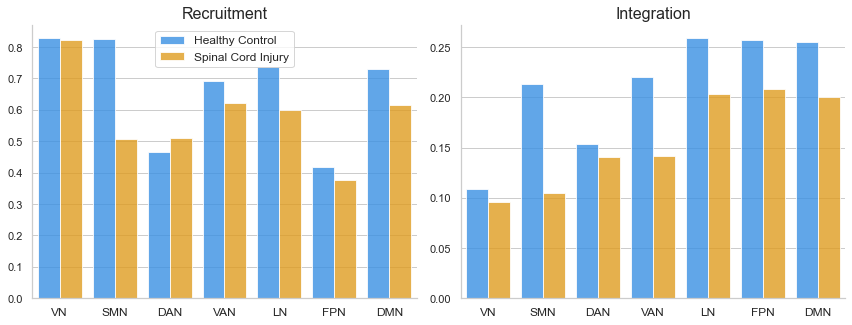

In [69]:
networks = ['VN', 'SMN', 'DAN', 'VAN', 'LN', 'FPN', 'DMN']

# corase recruitment values
rec_mor = np.diag(allegiance_coarse[0]) # HC
rec_eve = np.diag(allegiance_coarse[1]) # SCI

# coarse integration values
int_mor = (allegiance_coarse[0].sum(1)-np.diag(allegiance_coarse[0]))/(allegiance_coarse[0].shape[1]-1) # HC
int_eve = (allegiance_coarse[1].sum(1)-np.diag(allegiance_coarse[1]))/(allegiance_coarse[1].shape[1]-1) # SCI

num = 2
data = np.concatenate((rec_mor, rec_eve, int_mor, int_eve), axis=0)
df = pd.DataFrame(data=data, columns=["Values"]) # index=rows
metric = np.repeat(['Recruitment', 'Integration'], 14, axis=0)
df['Metric'] = metric
group = np.tile(networks, 2*num)
df['Network'] = group  
session = np.tile(np.repeat([group_label[0], group_label[1]], 7, axis=0), num)
df['Session'] = session 

sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Recruitment
sns.barplot(x="Network", y="Values", hue="Session", ax=ax1,
                 data=df.loc[df['Metric']=='Recruitment'],
                 palette=['#1E90FF', '#FFA500'], alpha=0.8)
ax1.set_xticklabels(networks, fontsize=12)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_title('Recruitment', fontsize=16) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# ax1.axhline(y=df.loc[df['Metric']=='Recruitment']['Values'].mean(), color='r', linestyle='--', linewidth=1.5, label='Mean')
ax1.legend(fontsize=12, loc='upper center')
 

# Integration
sns.barplot(x="Network", y="Values", hue="Session", ax=ax2,
                 data=df.loc[df['Metric']=='Integration'],
                 palette=['#1E90FF', '#FFA500'], alpha=0.8)

ax2.set_xticklabels(networks, fontsize=12)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_title('Integration', fontsize=16) 
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax2.axhline(y=df.loc[df['Metric']=='Integration']['Values'].mean(), color='r', linestyle='--', linewidth=1.5, label='Mean')
ax2.legend(fontsize=12, loc='best')
ax2.get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/catplot_'+analysis+'.pdf', bbox_inches='tight', pad_inches=0, format='pdf', dpi=300) 


In [24]:
data

array([0.82940042, 0.82581564, 0.46720907, 0.69044693, 0.73541667,
       0.4177799 , 0.73000913, 0.82325107, 0.50827521, 0.51178178,
       0.62168405, 0.59922587, 0.37754911, 0.61695722, 0.10896983,
       0.21312755, 0.15347719, 0.2203874 , 0.25929118, 0.25689739,
       0.25547843, 0.09630373, 0.10467616, 0.1409853 , 0.14143267,
       0.2033529 , 0.20869062, 0.19989124])

In [24]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:41:23.743900


In [21]:
# import os
# os.environ['SUBJECTS_DIR'] # Sanity check

In [22]:
# import types
# import pip #needed to use the pip functions
# # for i in pip.get_installed_distributions(local_only=True):
# #     print(i)

# def imports():
#     for name, val in globals().items():
#         if isinstance(val, types.ModuleType):
#             yield val.__name__
# list(imports())

In [23]:
import pkg_resources

installed_packages = pkg_resources.working_set
for package in installed_packages:
    print(f"{package.key}=={package.version}")

ipykernel==5.5.5
jupyter-console==6.4.4
notebook==6.5.6
babel==2.11.0
bottleneck==1.3.5
brotli==1.0.9
jinja2==3.1.2
markupsafe==2.1.1
pillow==10.1.0
pyqt5==5.15.10
pyqt5-sip==12.13.0
pyqtwebengine==5.15.6
pysocks==1.7.1
pyyaml==6.0.1
pygments==2.15.1
qdarkstyle==3.0.2
qtawesome==1.2.2
qtpy==2.4.1
rtree==1.0.1
sqlalchemy==2.0.23
send2trash==1.8.2
sphinx==5.0.2
unidecode==1.2.0
alabaster==0.7.12
anyio==3.5.0
applaunchservices==0.3.0
appnope==0.1.2
apptools==5.2.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
astor==0.8.1
astroid==2.14.2
asttokens==2.0.5
atomicwrites==1.4.0
attrs==23.1.0
autopep8==1.6.0
backcall==0.2.0
bctpy==0.6.1
beautifulsoup4==4.12.2
bids-validator==1.13.1
binaryornot==0.4.4
black==0.0
bleach==4.1.0
brainconn==0.0.1
certifi==2023.11.17
cffi==1.16.0
cftime==1.6.3
chardet==4.0.0
charset-normalizer==2.0.4
citeproc-py==0.6.0
click==8.1.7
cloudpickle==2.2.1
colorama==0.4.6
comm==0.1.2
configobj==5.0.8
contourpy==1.2.0
cookiecutter==1.7.3
cryptography==41.0.

<ipython-input-23-80b1638e1925>:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
